---
>テンソル(tensor)はテンション(張力:tension)同様「張る」を意味する語に由来する\
>密度が一様の弾性球体に一方向から張力を作用させたとき体積不変のまま楕円球体へと変形するが、その時の変形との関係を表すために導入されたのがテンソルであった\
>その意味が拡大され、今のテンソルとなった\
>読みはテンソル派とテンサー派があるが、日本語なら「テンソル」が大勢で、英語なら「テンソー」が近いのではないか
---

# Tensorの扱い

PyTorchのTutorialsに従う

なお、テンソル(多次元配列)の操作や、演算、並び替え、追加削除、形の変更などは、numpyでも可能である

しかしながら、PyTorchを利用する以上、変更するためにいちいちnumpyにすることは無駄であり、なによりも、それができないことの方が多い
- PyTorchは自動微分機能を備えており、学習に関わる演算やテンソル操作では、numpyに変更すると、その機能が利用できなくなる
- つまり、PyTorchの機能だけを使って、全ての演算を行わなければならない
  - 逆に言えば、PyTorchはそれ単体で強力なテンソル操作・演算命令を備えていることになる
  - DNNに限れば、学ぶべきはnumpyよりもPyTorchの基本テンソル操作命令

PyTorchについてわからないことがあれば、まず本家の解説を参照するとよい
- PyTorchには、100種類以上のテンソル操作関数が準備されている
- 詳細は、http://pytorch.org/docs/stable/torch.html
を参照のこと
  - 用語や関数名など関連する内容を調べることができる
  - 様々な記述例も存在するため参考にするとよい
  - フーリエ変換、逆行列、何でもあり
  - 意味を知っていて使えればよく、実装原理はここではどうでもよい


## 基本演算

PyTorchではTensor型を用いて行列を表現する
- TensorはNumpyのndarrayと類似しているが、GPU利用による高速化が可能であるのと、後で述べるが自動微分用のパラメタが追加されている


### empty

- Tensorを作成する際に、最も基本となる方法
- emptyという名称であるが、中身は初期化されていないことに注意する

In [ ]:
import torch
x = torch.empty(5, 3)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

### rand

乱数で初期化するには次のようにする

In [ ]:
x = torch.rand(5, 3)
x

tensor([[0.2941, 0.2072, 0.1948],
        [0.1396, 0.0221, 0.6149],
        [0.3874, 0.9183, 0.0766],
        [0.1981, 0.0885, 0.7889],
        [0.8998, 0.0723, 0.1634]])

### zeros

ゼロで初期化するには次のようにする
- torch.longは64bitの整数で与えることを意味している。

In [ ]:
x = torch.zeros(5, 3, dtype=torch.long)
x

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

値で初期化するには次のようにする

In [ ]:
x = torch.tensor([[0.2417, 0.2270, 0.5315],
        [0.4860, 0.9984, 0.3871],
        [0.4769, 0.8593, 0.2609],
        [0.0173, 0.1879, 0.9608],
        [0.1309, 0.9766, 0.6346]])
x

tensor([[0.2417, 0.2270, 0.5315],
        [0.4860, 0.9984, 0.3871],
        [0.4769, 0.8593, 0.2609],
        [0.0173, 0.1879, 0.9608],
        [0.1309, 0.9766, 0.6346]])

### new_ones

特に1で埋めるメソッドがあり、次のようにする

In [ ]:
x = x.new_ones(5, 3, dtype=torch.double)
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

### randn_like

既に存在するテンソル(ここではx)と同じサイズで異なる値を持つテンソルを生成する
- _likeがつく他の関数も、同様にすでに存在するテンソルと同じサイズでテンソルを作成する
- randは[0,1)の一様乱数，randnは平均0・分散1の正規乱数を生成する

In [ ]:
x = torch.randn_like(x, dtype=torch.float)
x

tensor([[ 1.5158,  0.8401, -0.3982],
        [ 0.1005,  0.6054,  0.4344],
        [ 0.5745,  1.2028, -0.5004],
        [-1.4162,  1.2096, -1.9952],
        [ 0.5637,  0.6086, -1.3906]])

### size, type

大きさを知るには、sizeメソッドを呼び出す

`type(x)`ではテンソル型であることがわかるだけである
- python全体に言えることだが、配列のサイズ表現を理解する時は、右から読むとよい
- ここでは、3つの要素を含む配列が、5要素入った配列、である

In [ ]:
x.size()

torch.Size([5, 3])

In [ ]:
x.type()

'torch.FloatTensor'

整数を要素にもつTensorと浮動小数点を要素にもつTensorをそれぞれ作成して違いを確認する
- 小文字tensorであることに注意する。

In [ ]:
x = torch.tensor([1,2,3,4,5,6])
x

tensor([1, 2, 3, 4, 5, 6])

In [ ]:
x.type()

'torch.LongTensor'

In [ ]:
x = torch.FloatTensor([1,2,3,4,5,6])
x

tensor([1., 2., 3., 4., 5., 6.])

In [ ]:
x.type()

'torch.FloatTensor'

次の大文字Tensorは注意が必要であろう

In [ ]:
x = torch.Tensor([1,2,3,4,5,6])
x.type()

'torch.FloatTensor'

In [ ]:
x = torch.randn_like(x, dtype=torch.float)
x

tensor([ 0.9694, -0.8706,  0.6710, -0.4998, -0.9429,  0.5730])

In [ ]:
x.size()

torch.Size([6])

### 演算

`[5,3]`のテンソル2つの足し算を行う

In [ ]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)
x+y

tensor([[1.0985, 1.0360, 0.4526],
        [0.5817, 1.2169, 0.4265],
        [1.0514, 0.3704, 0.8652],
        [1.2782, 1.0263, 0.7418],
        [1.5563, 0.6987, 1.1454]])

torchが準備するaddメソッドを用いることもできるが、やっていることは同じであるため、演算子オーバーロードされている方がわかりやすいであろう

In [ ]:
torch.add(x,y)

tensor([[1.0985, 1.0360, 0.4526],
        [0.5817, 1.2169, 0.4265],
        [1.0514, 0.3704, 0.8652],
        [1.2782, 1.0263, 0.7418],
        [1.5563, 0.6987, 1.1454]])

結果を格納するTensorを準備して、出力先を指定することができるが、直観的ではない

In [ ]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
result

tensor([[1.0985, 1.0360, 0.4526],
        [0.5817, 1.2169, 0.4265],
        [1.0514, 0.3704, 0.8652],
        [1.2782, 1.0263, 0.7418],
        [1.5563, 0.6987, 1.1454]])

次のように演算子オーバーロードを利用するのがよい
- 今何の型を使って演算しているのかがわかりにくいという意見は平成の人だから無視してよい
  - 昭和の人は型に縛られる言語を使っていない
  - 令和世代は柔軟に対応しよう

In [ ]:
y1 = y
y2 = y
y1.add_(x)
y2 += x
print(y1)
print(y2)

tensor([[1.2257, 1.9993, 0.7440],
        [1.0217, 1.6974, 0.7917],
        [1.7255, 0.4623, 1.7162],
        [1.6718, 1.1665, 1.2408],
        [2.4524, 1.3399, 1.9689]])
tensor([[1.2257, 1.9993, 0.7440],
        [1.0217, 1.6974, 0.7917],
        [1.7255, 0.4623, 1.7162],
        [1.6718, 1.1665, 1.2408],
        [2.4524, 1.3399, 1.9689]])


### 配列の操作

行の入手はy1[1]とすればよい

In [ ]:
y1[1]

tensor([1.0217, 1.6974, 0.7917])

NumPyと同様の方法で列を入手することもできる

- :でテンソル全体を指定し、その1番目の列を指定することで、１番目の列が入手できる(0オリジン)

In [ ]:
y1[:,1]

tensor([1.9993, 1.6974, 0.4623, 1.1665, 1.3399])

部分要素を取り出す

In [ ]:
y1[2:4,1]

tensor([0.4623, 1.1665])

要素数1のTensorにitem()メソッドを使うことで、計算履歴を含まないpythonの値として取得できる

ここで、detachとitemメソッドの違いについて説明しておく
- detachは既に何度も登場したとおり、autogradに必要な計算履歴管理を外す
  - 対象となるtorch.tensorがどのような型や要素数であっても問題ない
  - 型や総素数を変化させない
- itemは要素数が1個のtorch.Tensorに限定され、それ以外はエラーとなり、スカラーとして取り出すことができる
  - 変換できるかどうかは次元数ではなく要素数で決まるため、多次元テンソルでも要素数が1個であれば変換可能
  - torch.tensorではなくなるため、結果的にdetachされている

なお、GPU変数をnumpyに取り出す際には、`.cpu().detach().numpy()`とする(後述)

In [ ]:
y

tensor([[1.2257, 1.9993, 0.7440],
        [1.0217, 1.6974, 0.7917],
        [1.7255, 0.4623, 1.7162],
        [1.6718, 1.1665, 1.2408],
        [2.4524, 1.3399, 1.9689]])

In [ ]:
for i in range(3):
  print(i,':', y[i][0].item())

0 : 1.2256827354431152
1 : 1.0217174291610718
2 : 1.7254621982574463


普通に表示するとtensor型になる

なお、```y[[i for i in range(3)]].item()```とすると、要素が1つではないためエラーとなる
- 試しにitem()を省いて実行すると次の通り

In [ ]:
print(y[[i for i in range(3)]])

tensor([[1.2257, 1.9993, 0.7440],
        [1.0217, 1.6974, 0.7917],
        [1.7255, 0.4623, 1.7162]])


これは不便だと思うかもしれないが、基本的にはdetachでNumpy Arrayに変更できるため困らないはずである

### transpose, view, reshape

PyTorchでテンソルのサイズを操作する関数としてtranspose, view, reshapeがある
- squeezeやunsqueezeもあるが後述する

- transposeはTensorを転置するだけ
  - なので利用シーンはかなり限られ、忘れてもあまり困らず、都度調べるレベルの関数
- view(y, x)で、y行x列のデータに変換
  - -1をどちらかに指定すると自動的に大きさから計算してくれるが、約数でないと変換できずエラーになる
  - viewはメモリ操作、つまりデータの入れ替えは行わず見え方のみ操作する関数であるため、メモリ上の並びを変えるような変換はできない
  - 例えば、transposeつまり転置したデータをviewで並び替えるとメモリ上での位置の変更が伴うためエラーになる
  - これを防ぐためにviewの前にcontiguous関数を呼び出してメモリ上で要素順に並び替えてからviewすると回避できる
    - これならば、次のreshapeと一緒なので、あえて利用する意味もない
- reshapeは、viewと同様であるが、contiguous関数を必要としない
  - データのコピーを生成するため、問題が解決する
  - エラーにはならない一方で、メモリと処理時間を浪費する

結局自分で適切な手法を選べということ

得たい結果とその結果を得るために必要なリソースの観点があるため、様々なニーズが存在する

- 命令セットが複雑になるのは、ニーズがあるためである

- 何でも扱えるように簡単にするか、細分化して計算速度やリソースの使い方まで言及するかは言語設計の基本に影響を与えるため、言語多様性における必要悪ともいえるであろう

In [ ]:
x = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
x = x.view(4, 3, 2)# 4x3x2の乱数行列を作成
y = x.view(24) # 24次元の行列を準備 (reshapeでも結果は同じ)
z = x.view(-1, 8)  # -1を使うと，サイズを自動調整 (reshapeでも結果は同じ)
print(x.size(), y.size(), z.size())

torch.Size([4, 3, 2]) torch.Size([24]) torch.Size([3, 8])


中身を確認する

In [ ]:
print(x, "\n", y, "\n", z)

tensor([[[ 1,  2],
         [ 3,  4],
         [ 5,  6]],

        [[ 7,  8],
         [ 9, 10],
         [11, 12]],

        [[13, 14],
         [15, 16],
         [17, 18]],

        [[19, 20],
         [21, 22],
         [23, 24]]]) 
 tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24]) 
 tensor([[ 1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16],
        [17, 18, 19, 20, 21, 22, 23, 24]])


次元(0オリジン)を2つ指定して入れ替える

In [ ]:
y = x.transpose(0,2)
print(y.size())
print(y)

torch.Size([2, 3, 4])
tensor([[[ 1,  7, 13, 19],
         [ 3,  9, 15, 21],
         [ 5, 11, 17, 23]],

        [[ 2,  8, 14, 20],
         [ 4, 10, 16, 22],
         [ 6, 12, 18, 24]]])


### flatten

flattenで、1次元配列にすることができる

In [ ]:
y = x.flatten()
print(y.size())
print(y)

torch.Size([24])
tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24])


### squeeze, unsqueeze

次元を削減するにはsqueeze()、増やすにはunsqueeze()を利用することもできる
- 要素が一つしかない次元を無くすことができる

In [ ]:
x = torch.rand(2, 1, 3, 1)
print(x.size())
print(x)

torch.Size([2, 1, 3, 1])
tensor([[[[0.0305],
          [0.6078],
          [0.6911]]],


        [[[0.0430],
          [0.7026],
          [0.1031]]]])


In [ ]:
y = x.squeeze()
print(y.size())
print(y)

torch.Size([2, 3])
tensor([[0.0305, 0.6078, 0.6911],
        [0.0430, 0.7026, 0.1031]])


unsqueezeはどの次元を増やすかを指定する

In [ ]:
z = y.unsqueeze(1)
print(z.size())
print(z)
z = y.unsqueeze(0)
print(z.size())
print(z)

torch.Size([2, 1, 3])
tensor([[[0.0305, 0.6078, 0.6911]],

        [[0.0430, 0.7026, 0.1031]]])
torch.Size([1, 2, 3])
tensor([[[0.0305, 0.6078, 0.6911],
         [0.0430, 0.7026, 0.1031]]])


### PyTorchテンソルの要素の型

テンソルの中に含める数値には、PyTorch独自のデータ型（`torch.dtypes`）が与えられているが、あるテンソルに含まれる全要素は全て同じデータ型である必要がある

以下の型が準備されているが、基本的に`torch.float`か`torch.int`しか使わないので、忘れてよい

データ型 | dtype属性への記述 | 対応するPython／NumPy（np）のデータ型
---------|-----------------|--------------------------------
Boolean（真偽値）|torch.bool|bool／np.bool
8-bitの符号なし整数|torch.uint8|int／np.uint8
8-bitの符号付き整数|torch.int8|int／np.int8
16-bitの符号付き整数|torch.int16 ／ torch.short|int／np.int16
32-bitの符号付き整数|torch.int32 ／ torch.int|int／np.int32
64-bitの符号付き整数|torch.int64 ／ torch.long|int／np.int64
16-bitの浮動小数点|torch.float16 ／ torch.half|float／np.float16
32-bitの浮動小数点|torch.float32 ／ torch.float|float／np.float32
64-bitの浮動小数点|torch.float64 ／ torch.double|float／np.float64


## NumPyとの連携

### Torch TensorからNumPyへの変換

In [ ]:
a = torch.ones(5)
b = a.numpy()
b

array([1., 1., 1., 1., 1.], dtype=float32)

ここから、pythonらしいマジックが入るが(これがpython嫌いを生む要素でもあるが)、numpy()はメモリを共有するため、aを変更すると、bも同時に変更される

ただし、**bに変数代入したときにこの関係は崩れ**、aを変更してもbは変更されなくなる
- この現象は、C++などにおけるCall by referenceとCall by valueの違いと同じ原理で発生する
- b = a.numpy()は、aのnumpy表示をbとする、ということで、bに実体はなく、bを呼び出すといつもa.numpy()が呼び出される

  - つまり、要するにエイリアスの関係にあり、毎回変換処理関数が呼び出される
  - そのあとb=「～」とbを変更すると、bはa.numpy()のある場所を指すのをやめて、新しく「～」というメモリ上の値を指すようになる
  - その後bを変更してもオリジナルが変更されるわけではない

python嫌いの気持ちがわかるであろう、昨日できたことが今日できないのだから
- 実際には=のオーバーロードである程度対応することも可能であるといえるが、言語仕様としては=しか代入がないのが問題ともいえる
- なんとか実行速度を上げようという努力は伝わる

なお、より実践的には次のようにする
- `to('cpu')`で、GPUではなくCPUにデータを保持する
- `detach()`で勾配計算のための付属情報を削除する
- `copy()`で不用意な書換を避ける
  - torch tensor と numpy ndarray はメモリを共有しており、どちらかを変更すると相手もそれにつられて変化する
  - これを避ける場合はtorch.clone()やnumpy.copy()もしくはdeepcopy()とする
  - 例でa.copy()はエラーとなる \
  a.to('cpu').detach().clone().numpy().copy()も無意味

ここで、cloneとの違いについても確認する
- copy()はnumpyについてメモリコピーを行う
- clone()はtensorについてメモリコピーを行う

In [ ]:
b = a.to('cpu').detach().numpy().copy()
b, type(b)

(array([1., 1., 1., 1., 1.], dtype=float32), numpy.ndarray)

In [ ]:
c = a.to('cpu').detach().clone().numpy()
c, type(c)

(array([1., 1., 1., 1., 1.], dtype=float32), numpy.ndarray)

これらは全てリンクが切れていることを確認する

In [ ]:
a.add_(1)
a

tensor([2., 2., 2., 2., 2.])

In [ ]:
b, c

(array([1., 1., 1., 1., 1.], dtype=float32),
 array([1., 1., 1., 1., 1.], dtype=float32))

### NumPyからTorch Tensorへの変換

aを要素がすべて1で5個有するArrayとする

torch Tensorに変換する際、from_numpy()メソッドを利用する方法とtorch.tensorを利用する方法、copy()メソッドを用いる方法があるが、次の点で異なる
- from_numpy()はメモリを共有する
- torch.tensor()はメモリコピーを行う
- なお、PyTorchは一般にtorch.floatを利用するので、numpyでfloat32などにキャストしてから利用する場合もある

これらの違いも含めて確認する

In [ ]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
c = torch.tensor(a)
d = a.copy()

In [ ]:
a, b, c

(array([1., 1., 1., 1., 1.]),
 tensor([1., 1., 1., 1., 1.], dtype=torch.float64),
 tensor([1., 1., 1., 1., 1.], dtype=torch.float64))

numpyで、addメソッドおよび+を利用して確認する

In [ ]:
np.add(a, 1, out=a)
a, b, c

(array([2., 2., 2., 2., 2.]),
 tensor([2., 2., 2., 2., 2.], dtype=torch.float64),
 tensor([1., 1., 1., 1., 1.], dtype=torch.float64))

つまり、from_numpyはメモリを共有しているのに対して、torch.tensorは、メモリをコピーしている

次のように記述しても同様であり、こちらが一般的である

In [ ]:
a += 1
a, b, c

(array([3., 3., 3., 3., 3.]),
 tensor([3., 3., 3., 3., 3.], dtype=torch.float64),
 tensor([1., 1., 1., 1., 1.], dtype=torch.float64))

さらに、次はどうだろうか

In [ ]:
a = a + 1
a, b, c

(array([4., 4., 4., 4., 4.]),
 tensor([3., 3., 3., 3., 3.], dtype=torch.float64),
 tensor([1., 1., 1., 1., 1.], dtype=torch.float64))

今度は、bは変化しない

=はメモリのコピーを生成するが、+=はコピーを生成しない、こんなややこしいことになっているが、奇天烈な日本語よりはいい

aとbのリンクが切れてしまったので時を戻そう
- cは初めから切れている

In [ ]:
b = torch.from_numpy(a)

次に、逆にbを変更する、もう答えはわかるであろう

In [ ]:
b+=5
b

tensor([9., 9., 9., 9., 9.], dtype=torch.float64)

次にaを表示する。

In [ ]:
a

array([9., 9., 9., 9., 9.])

きちんとaも変化している

では、代入するとどうであろうか？

In [ ]:
a = np.zeros(5)

In [ ]:
a, b

(array([0., 0., 0., 0., 0.]),
 tensor([9., 9., 9., 9., 9.], dtype=torch.float64))

ということで、今度はaを変化させても、bは変化しないが、理由はこちらも同様である

つまり、メソッドを使ううちはリンクは切れないが、違うインスタンスに付け替えられるとリンクが切れて、新しい値へのリンクになる

### メモリコピーによる弊害の確認

from_numpyについて、そのままとcloneした場合の速度を比較する
- `%%timeit`による処理速度計測の例を示す
- 同様に様々なケースの比較を行うとよいであろう

In [ ]:
%%timeit
b = torch.from_numpy(a.astype(np.float32))

5.77 µs ± 1.93 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
b.type()

'torch.DoubleTensor'

In [ ]:
%%timeit
b = torch.from_numpy(a.astype(np.float32)).clone()

15.1 µs ± 2.89 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
b.type()

'torch.DoubleTensor'

同様に、numpyに変換して、copyする際の処置についても確認する
- cpuにもってきて操作した場合でさらにgpuで引き継いで計算する場合は忘れずにb.to('cuda')などとしてgpuに移動させること
- ただし、一般にそういうことをすると効率が悪く、PyTorchだけで計算させるようにコードを修正するべきである

In [ ]:
%%timeit
c = b.to('cpu').detach().numpy()

3.42 µs ± 547 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
c.type()

'torch.DoubleTensor'

In [ ]:
%%timeit
c = b.to('cpu').detach().numpy().copy()

3.93 µs ± 82.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
c.type()

'torch.DoubleTensor'

## Broadcasting

Numpyにも存在するブロードキャスト機能について、PyTorchにおいても採用されている
- 利用できる場合とできない場合があるので確認すること

例えば、下記の例で、テンソルに2を加える場合、全ての要素に2が加わる

In [ ]:
a1 = torch.tensor([[1, 2], [3, 4]])
a2 = torch.tensor(2)
a1 + a2

tensor([[3, 4],
        [5, 6]])

3重配列でも、動作する

In [ ]:
a1 = torch.tensor([[[-1, 2], [-3, 4]], [[5, -6], [7, -8]]])
torch.nn.functional.relu(a1)

tensor([[[0, 2],
         [0, 4]],

        [[5, 0],
         [7, 0]]])

次の場合、全要素を合算するという関数であるため、ブロードキャスト動作は期待できない

In [ ]:
a1 = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
torch.sum(a1)

tensor(36)

関数であれば、ブロードキャストできる

In [ ]:
a1 = torch.tensor([[-1, 2, -3, 4], [5, -6, 7, -8]])
a2 = torch.tensor([[[-1, 2], [-3, 4]], [[5, -6], [7, -8]]])
def f1(x):
  return sum(x)
print(f1(a1))
print(f1(a2))
def f2(x):
  return x[0]+x[1]
print(f2(a1))
print(f2(a2))

tensor([ 4, -4,  4, -4])
tensor([[ 4, -4],
        [ 4, -4]])
tensor([ 4, -4,  4, -4])
tensor([[ 4, -4],
        [ 4, -4]])


## やばいpython

ついでに、pythonのネガティブキャンペーンを続けよう

次は、`a = np.array([0,1,2])`と同じである

In [ ]:
a = np.arange(3)
a

array([0, 1, 2])

これを転置する

In [ ]:
a.T

array([0, 1, 2])

え？転置できない？？？

その通り、これではできない\
次のようにする

In [ ]:
a = np.array([[0, 1, 2]])
a

array([[0, 1, 2]])

転置する

In [ ]:
a.T

array([[0],
       [1],
       [2]])

なぜ2重配列なのだ？と思うかもしれないが、そういう仕様である
- [0, 1, 2]はメモリに順番に0, 1, 2と記載されていることを意味するので、転置されてもメモリに格納されている順序や格納形態は変わらない
- [0], [1], [2]も同様ではないか、と思うかもしれないが、これは違う
  - [0]は配列であり、メモリ上は、array([0]), array([1]), array([2])とarrayであるという識別子も記載されており、占有メモリサイズは[0, 1, 2]よりも大きい、つまり、より表現力が拡大している

- array([0, 1, 2])とは、メモリ上の表現自体が変化しており、転置に成功する

もうひとつ、`TypeError: '～' object is not callable`というエラーに遭遇したら要注意

これは、`～`というpythonのコマンドと同じ名前の変数を作ってしまった場合など発生し、初心者は結構これでハマることが多い

- 周辺の記述を間違えると、`～`という記述がコードに出てきてそれが変数と解釈される結果、このエラーが発生する

対処法は、例えば`%whos`コマンドで、使用している変数一覧をみて、問題となるpythonコマンドが変数として宣言されていないかを確認する

- 宣言されていれば、`del ～`として削除すればよい

- ぶっちゃけ、正しいコードである自信があるなら、仮想マシンをリフレッシュしてもよい

  - メニューのランタイムから、ランタイムを出荷状態にリセットを選択すればよい

In [ ]:
%whos

Variable   Type        Data/Info
--------------------------------
a          ndarray     1x3: 3 elems, type `int64`, 24 bytes
a1         Tensor      tensor([[-1,  2, -3,  4],<...>       [ 5, -6,  7, -8]])
a2         Tensor      tensor([[[-1,  2],\n     <...>6],\n         [ 7, -8]]])
b          Tensor      tensor([9., 9., 9., 9., 9.], dtype=torch.float64)
c          Tensor      tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
d          ndarray     5: 5 elems, type `float64`, 40 bytes
f1         function    <function f1 at 0x7a2bf54b04a0>
f2         function    <function f2 at 0x7a2bf54b0220>
i          int         2
np         module      <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
result     Tensor      tensor([[1.0985, 1.0360, <...>1.5563, 0.6987, 1.1454]])
torch      module      <module 'torch' from '/us<...>kages/torch/__init__.py'>
x          Tensor      tensor([[[[0.0305],\n    <...>,\n          [0.1031]]]])
y          Tensor      tensor([[0.0305, 0.6078, <...>0.0430

## GPUとCPUの使い分け

まず、GPUが搭載されているか、どのGPUが使われているかを確認する

In [ ]:
if torch.cuda.is_available():
  print(f'GPUデバイス数： {torch.cuda.device_count()}')
  print(f'現在のGPUデバイス番号： {torch.cuda.current_device()}')
  print(f'1番目のGPUデバイス名： {torch.cuda.get_device_name(0)}')
else:
  print('GPUは使えません')

GPUデバイス数： 1
現在のGPUデバイス番号： 0
1番目のGPUデバイス名： Tesla T4


現在利用しているGPUのデバイスを取得する

In [ ]:
device = torch.device("cuda")          # デフォルトのCUDAデバイスオブジェクトを取得
device0 = torch.device("cuda:0")       # 1番目（※0スタート）のCUDAデバイスを取得
print(device)
print(device0)

cuda
cuda:0


テンソル計算にGPUを使う場合について以下の通りにする

- まずテンソルをGPUで生成するときはdeviceで指定する
- テンソルを移動するときはtoを使う
- 別の書き方として、
  - GPUで演算するには、演算前にcudaメソッドを使う
  - CPUで演算するには、演算前にcpuメソッドを使う

もちろんであるが、直接cpuやcudaをしてしてもよいし、省略してもよい

In [ ]:
g = torch.ones(2, 3, device=device)
g = x.to(device)
g = x.cuda(device)
f = x.cpu()
g = x.to("cuda")
f = x.to("cpu")
g = x.cuda() # GPUがセットされていて、かつGPUが獲得できていなければエラーになる

なお、テンソルではなく、学習したモデルのcpuとcudaの移動は次のようにする
- model.cuda()
  - モデルの全パラメーターとバッファーをCUDAに移行
- model.cpu()
  - モデルの全パラメーターとバッファーをCPUに移行

# 自動微分について

自動微分(Autograd)とは
- Tensorの各要素による微分を自動で行う機能
- 演算内容と計算グラフを保持し順伝播の経路を遡って勾配を計算できる

PyTorchのテンソルとAutogradにより、逆伝播の演算を自動化できる

### grad（勾配）の扱い

- Pytorch内では、torch.Tensorクラスでテンソル（多次元行列）を扱う
- .requires_gradメンバ変数で勾配を記録して追いかけることができるようにするかどうかを選択できる
  - Trueにすると重くなる
  - .backward()で勾配（微分値）を取得する
  - また、得られた勾配から誤差逆伝搬法で重みを更新する
- .gradメンバ変数に勾配データを保持する
- .detach()メンバ関数でトラック対象から外すことができる
- .requires_grad_ メンバ関数でフラグを反転させることができる。

各変数は、.grad_fnというプロパティ（属性）を保有し、これが実際に勾配を計算するメソッドである

In [ ]:
import numpy as np
import torch
import torch.nn as nn

## 実際の操作

テンソルを作成する

requires_grad=Falseとすると微分の対象にならず勾配としてNoneを返す

Trueとして宣言する

In [ ]:
x = torch.ones(2, 2, requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

y = x+2を計算し表示させる

In [ ]:
y = x+2
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

.grad_fnを確認する

AddBackword0と表示されるように、足し算であることを記録している

In [ ]:
y.grad_fn

関数へのポインタが示されているので実態はわからないが、足し算であることはわかる

$Y\cdot Y \cdot 3$を計算し表示する

In [ ]:
z=y*y*3
z

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)

zの平均を計算する

In [ ]:
out = z.mean()
out

tensor(27., grad_fn=<MeanBackward0>)

平均値である27が得られる

このzつまり平均を求める計算も勾配計算でき、MeanBackword0として示されている

### autograd属性の反転

2x2の平均が0である乱数Tensorを作成する。

In [ ]:
a = torch.randn(2,2)
a

tensor([[ 1.4522,  1.1797],
        [-0.1800,  0.0493]])

requires_gradを確認する

randnはデフォルトがFalseであるため、明示的にTrueとする

In [ ]:
a.requires_grad

False

In [ ]:
a.requires_grad_(True)
a.requires_grad

True

$a\cdot a$を求め、その要素の総和を計算する。

In [ ]:
b=(a*a).sum()
b

tensor(3.5354, grad_fn=<SumBackward0>)

### backward()を用いて微分値を求める

まず、ここまでを振り返ると、out という値を得るために、
- 要素がすべて1の2x2行列$\boldsymbol{x}$を定義
- $\boldsymbol{y} = \boldsymbol{x}+2$を計算
- $\boldsymbol{z} = \boldsymbol{y}\cdot \boldsymbol{y} \cdot 3$を計算
- outをzの要素の平均値とする

以上の計算を行ってきた

ここで、xの変化量が、outにどれだけ影響するか？の勾配を算出する

out.backward()として、微分演算ができるようにし、実際にxによる偏微分を求める

つまり、
${d\boldsymbol{out} \over d\boldsymbol{x}}$
を計算する。

In [ ]:
out.backward()
x.grad

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

答えを確認する

$$\boldsymbol{z}_i = 3(\boldsymbol{x}_i+2)^2$$
$$\boldsymbol{out} = {1 \over 4}\sum_i \boldsymbol{z}_i$$
$$\left.\boldsymbol{z}_i \right|_{x_i=1} = 27$$
である

$$
\begin{aligned}
 {\partial \boldsymbol{out} \over \partial \boldsymbol{x}_i}&={1 \over 4}\cdot{\partial (3(\boldsymbol{x}_i+2)^2)\over \partial \boldsymbol{x}_i} \\
&={3 \over 2}(\boldsymbol{x}_i+2)
\end{aligned}
$$
となる

$\boldsymbol{x}_1=1$のとき$4.5$となることがわかる

同様に、$y=w\cdot x + b$について、実際に微分値を求める
- $(x, w, b)=(1, 2, 3)$と初期化し、requires_gradをTrueとする
- $y$を求め、`y.backward()`で勾配を計算し、これを表示する

In [ ]:
x = torch.tensor(1.0, requires_grad=True)
w = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(3.0, requires_grad=True)
y = w * x + b
y.backward()
print(x.grad)  # dy/dx = w = 2
print(w.grad)  # dy/dw = x = 1
print(b.grad)  # dy/db = 1
x

tensor(2.)
tensor(1.)
tensor(1.)


tensor(1., requires_grad=True)

$y=x^2$について計算してみると${dy \over dx} = 2x$であり、実際$x=2$のとき4になる

In [ ]:
x = torch.tensor(2.0, requires_grad=True)
y = x ** 2
y.backward()
x.grad

tensor(4.)

なお、若干型が異なるが、次のようにしても計算できる

In [ ]:
x = torch.tensor(2.0, requires_grad=True)
y = x ** 2
torch.autograd.grad(y, x)

(tensor(4.),)

$y=e^x$とすると、${dy \over dx}=e^x$であるから、$e^2$の値が得られる

計算グラフを構築するときは numpy の関数 numpy.exp() を使ってはいけない
- 当然であるが、テンソル計算を行う専用の関数を使う torch.exp()


In [ ]:
x = torch.tensor(2.0, requires_grad=True)
y = torch.exp(x)
y.backward()
x.grad

tensor(7.3891)

(利用するかどうかはともかく)三角関数も問題ない

$y=sin(x)$のとき${dy \over dx} = cos(x)$であるので、$x=\pi$のとき-1になる

In [ ]:
x = torch.tensor(np.pi, requires_grad=True)
y = torch.sin(x)
y.backward()
print(x.grad)

tensor(-1.)


もっと複雑な例で試す

$y=(\sqrt{x}+1)^3$とすると${dy \over dx} = {3(\sqrt{x}+1)^2 \over 2\sqrt{x}}$となる

答えがあっているかどうかは各自で確認してほしい

In [ ]:
x = torch.tensor(2.0, requires_grad=True)
y = (torch.sqrt(x) + 1) ** 3
y.backward()
x.grad

tensor(6.1820)

偏微分も問題ない

$z=(x+2y)^2$とすると、
- ${\partial z \over \partial x} = 2(x+2y)$
- ${\partial z \over \partial y} = 4(x+2y)$

となることから、$(x, y) = (1, 2)$のとき、それぞれ10および20となる

In [ ]:
x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(2.0, requires_grad=True)
z = (x + 2 * y) ** 2
z.backward()
print(x.grad)  # dz/dx
print(y.grad)  # dz/dy

tensor(10.)
tensor(20.)


計算を連結させても問題ない

In [ ]:
def calc(x):
  x = x*2+1
  x = x**2
  x = x/(x+2)
  x = x.mean()
  return x
x = [1.0, 2.0, 3.0]
x = torch.tensor(x, requires_grad=True)
y= calc(x)
y.backward()
x.grad.tolist()

[0.06611569225788116, 0.01828990876674652, 0.007176725193858147]

勾配が正しく計算できているかどうかをxを微小変化させたときのyの差を見て確認する

確認作業では特に自動微分の機能を使わないのでrequires_gradをFalseとして計算速度を上げる
  - といってもほとんど変わらないので意味はない
  - それでもやる！地球にやさしい授業にしたい


In [ ]:
delta = 0.001  #変化量
x = [1.0, 2.0, 3.0]
x = torch.tensor(x, requires_grad=False)
y = calc(x).item()

x_1 = [1.0+delta, 2.0, 3.0]
x_1 = torch.tensor(x_1, requires_grad=False)
y_1 = calc(x_1).item()

x_2 = [1.0, 2.0+delta, 3.0]
x_2 = torch.tensor(x_2, requires_grad=False)
y_2 = calc(x_2).item()

x_3 = [1.0, 2.0, 3.0+delta]
x_3 = torch.tensor(x_3, requires_grad=False)
y_3 = calc(x_3).item()

# 勾配の計算
grad_1 = (y_1 - y) / delta
grad_2 = (y_2 - y) / delta
grad_3 = (y_3 - y) / delta

print(grad_1, grad_2, grad_3)

0.06604194641113281 0.018298625946044922 0.007152557373046875


殆ど値が一致していることがわかるであろう

PyTorchの機能や中身の一部であるが核心が理解できたであろう

# 実際のデータの取り込み

実際にはコード中でデータを直接記述することはなく、外部からデータを読み込むことが殆どであろう
- 例えばcsvなどの形式で取り込むであろう
- AIについて学ぶ際には、既に準備されている学ぶための専用のデータセットを用いることも多いであろう
  - PyTorchも様々なデータセットを準備しており、詳細はPyTorchのDocsを参照するとよい

ここでは、PyTorchが準備するデータセット、さらにPyTorchが備えるDataLoader、またPyTorchにおけるミニバッチ法の実装例を示す

今回も手書き文字認識であるが、MNISTと呼ばれる、より本格的なデータを用いる

## DataLoaderを用いたミニバッチ法

既に簡単に触れたが、PyTorchが準備するDataLoaderを利用するとデータの読み込みおよびミニバッチ法の実装が容易になり、処理効率も向上する

次の例のように、`torchvision.datasets`を使って最初に手書き文字のデータを読み込む

- `torchvision.datasets`には様々なデータセットが準備されている

`transform`をimportすることで、前処理としてのデータ変換を行う`transforms.ToTensor()`が利用できるようにする

- PyTorchはテンソル型のデータしか扱えないため、変換するために必要
- なぜテンソル型にする必要があるかは既に説明済み

そして**DataLoader**を用いてデータ分割とバッチ生成を行う

- scikit-learnのtrain_test_split関数と目的は同じ
  - PyTorchは、モデル側もバッチに対応してまとめて入力できるようになるため、モデル側の記述の修正が不要

- DataLoaderではバッチサイズを指定してデータ分割を行うため応用しやすい

- ここではバッチサイズを大きめの256と設定しているが、GPU搭載マシンである場合はこの程度の数でも問題ない

  - 大きめの数を指定することで、GPUの能力を発揮できるようになる
  - ただし、まとめて逆伝播の勾配計算も行われるため、学習の進み方、精度などに影響することに注意する

- 訓練用データの取り出しには、毎回異なるデータをランダムに取り出してバッチを生成させるため、shuffleをTrueにしている

- テスト用データの取り出しは、そのような必要はないため、Falseである

DataLoaderが読めるのは入力とラベルがセットになったデータである
- 次の実装例では、PyTorchが提供するデータセットを利用するので問題ないが

自分でデータセットを準備する場合は、次の命令を利用して事前に作成しておく必要がある
- `ds = TensorDataset(x, y)`
- 既にscikit-learnが準備するデータセットを用いて、TensorDatasetを使ってDetaLoader用のデータセットを構成する仕方について学習済みである

なお、testデータの方は、特にミニバッチ法を取り入れる意味はないため、全数指定している

- ミニバッチ法を採用しても、悪いということはない
  - つまり`batch_size=len(mnist_test)`の部分をtrainと同様にしても問題はない

ここでは、PyTorchが提供する、より画素数の多いMNISTを用いる

In [ ]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader
# 訓練データを取得
mnist_train = MNIST("./mydata", # 保存先フォルダの指定
                    train=True, download=True,
                    transform=transforms.ToTensor())
# テストデータの取得
mnist_test = MNIST("./mydata", # 保存先フォルダの指定
                   train=False, download=True,
                   transform=transforms.ToTensor())
print("\n訓練データの数:", len(mnist_train), "テストデータの数:", len(mnist_test))
# DataLoaderの設定
batch_size = 256
train_loader = DataLoader(mnist_train,
                          batch_size=batch_size,
                          shuffle=True)
test_loader = DataLoader(mnist_test,
                         batch_size=len(mnist_test),
                         shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 505kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.70MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.29MB/s]

訓練データの数: 60000 テストデータの数: 10000


## モデル構築

前回は直接Sequentialによりモデルを構築したが、今回はより実践的に`nn.Module`モジュールを継承したクラスとしてモデルを構築する

`.cuda()`により、モデルの計算はGPU上で行われる

- Google ColaboratoryはGPUに対応している

- メニューの編集、ノートブックの設定から、GPUを利用するのチェックが入っていることを確認しておく

`__init__`つまりコンストラクタでトポロジを指定する

- 親クラスのコンストラクタを呼び出すのを忘れないように

forwardメソッドで活性化関数関数を指定する

ネットワーク全体で見て、入力は画素数、出力は10個の数字である

- 今回利用するMNISTの画像データの画素数は784である
  - scikit-learnの手書き文字認識が$8\times 8=64$であったのに対して$28 \times 28 = 784$と大幅に増えている

  - 画素数も多いため、隠れ層のノード数も$1024$とかなり大きくしている
  - ただし層の数は少なめで、それほど精度は期待できないかもしれない

ここでは、$28 \times 28$の2次元画像構成を単純に$784$の1次元構成に変換するため、並び替えは伴わず、高速で効率の良いviewを利用する

- transposeでも動作し、この程度ならば殆ど変わらない


画像サイズについて確認しよう
- このあたりは、猫の目のように仕様が変わるところ

train_loaderの__iter__()メソッド、さらにnext()をを呼び出す
- 本来はfor文などのループで順番に値を取り出すが、forを使わずに無理やり取り出す
- 呼び出し方として、関数で呼び出す方法と、引数として取り出す方法がある  
```
iter(train_loader)
train_loader.__iter__()
```
- いずれもSingleProcessDataLoaderIterという型を返す
- これを表示するためにnextの引数として取り出す

中身は、list形式で、入力データと正解ラベルであるため、直接shapeを使うことはできない
- python list形式には、多次元配列の大きさを簡単に調べる関数がない
- numpy.arrayで変換するか、要素を取り出して調べる

ここでは、要素を取り出して確認する

まず、全体を表示すると、中身は、tensor形の画像情報と、正解ラベルがそれぞれ、バッチサイズ個入っていることがわかる


In [ ]:
next(iter(train_loader))

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

それぞれの要素について中身を確認する

- 画像データは、28x28画素で構成され、ミニバッチ個数(256枚)ある
- 正解ラベルもミニバッチ個数(256個)ある

In [ ]:
next(iter(train_loader))[0].shape, next(iter(train_loader))[1].shape

(torch.Size([256, 1, 28, 28]), torch.Size([256]))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 1024)  # 全結合層
    self.fc2 = nn.Linear(1024, 512)
    self.fc3 = nn.Linear(512, 10)
  def forward(self, x):
    x = x.view(-1, 784)  # バッチサイズ×入力の数
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
net = Net()
net.cuda()  # GPU対応
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


## 学習

モデルを訓練する

**DataLoaderを使い、順次ミニバッチを取り出して訓練と評価を行う**

1エポックの中で何度もミニバッチを使って訓練される

なお、評価もミニバッチができるような記述であるが、全数を一気に取得するので、実際はミニバッチではない

In [ ]:
from torch import optim
# 交差エントロピー誤差関数
loss_fnc = nn.CrossEntropyLoss()
# SGD
optimizer = optim.SGD(net.parameters(), lr=0.01)
# 損失のログ
record_loss_train = []
record_loss_test = []
# 学習
for i in range(20):  # 20エポック学習
  net.train()  # 訓練モードへ
  loss_train = 0
  for j, (x, t) in enumerate(train_loader):  # ミニバッチ(x,t)を取り出す
    x, t = x.cuda(), t.cuda()  # GPUのメモリに配置する
    y = net(x)
    loss = loss_fnc(y, t)
    loss_train += loss.item()  # ミニバッチなので、誤差を蓄積させていく
    optimizer.zero_grad() # RNNではためることもあるが普通は初めに勾配を0初期化必須
    loss.backward() # 逆伝播してパラメタを計算
    optimizer.step() # 計算した値でパラメタを更新
  loss_train /= j+1  # ループから抜けたらロスの平均を計算
  record_loss_train.append(loss_train)
  net.eval() # 評価モードへ
  loss_test = 0
  for j, (x, t) in enumerate(test_loader):  # ミニバッチ(x,t)の取り出し、trainと全く同じ
    x, t = x.cuda(), t.cuda()
    with torch.no_grad():
      y = net(x)
    loss = loss_fnc(y, t)
    loss_test += loss.item()
  loss_test /= j+1
  record_loss_test.append(loss_test)
  print("Epoch:", i, "Loss_Train:", loss_train, "Loss_Test:", loss_test)

Epoch: 0 Loss_Train: 2.215922128393295 Loss_Test: 2.0865707397460938
Epoch: 1 Loss_Train: 1.8133529764540652 Loss_Test: 1.4271214008331299
Epoch: 2 Loss_Train: 1.1093423681056245 Loss_Test: 0.8382720947265625
Epoch: 3 Loss_Train: 0.7303574026899134 Loss_Test: 0.613180935382843
Epoch: 4 Loss_Train: 0.5739723211907326 Loss_Test: 0.5072354078292847
Epoch: 5 Loss_Train: 0.4924070326571769 Loss_Test: 0.44512510299682617
Epoch: 6 Loss_Train: 0.442411788473738 Loss_Test: 0.4066157639026642
Epoch: 7 Loss_Train: 0.4091849401910254 Loss_Test: 0.3792034089565277
Epoch: 8 Loss_Train: 0.3853964219702051 Loss_Test: 0.35955289006233215
Epoch: 9 Loss_Train: 0.3668624184233077 Loss_Test: 0.34371355175971985
Epoch: 10 Loss_Train: 0.3521088307842295 Loss_Test: 0.33182305097579956
Epoch: 11 Loss_Train: 0.34022774626599983 Loss_Test: 0.32099613547325134
Epoch: 12 Loss_Train: 0.3301553991880823 Loss_Test: 0.3118164539337158
Epoch: 13 Loss_Train: 0.3208983047211424 Loss_Test: 0.30425238609313965
Epoch: 14 Lo

## 誤差の推移
訓練データ、テストデータで誤差の推移をグラフ表示する

TestよりもTrainの方が誤差が大きく出ている
- これはミニバッチにより複数の訓練の平均のロスと訓練後のロスを比較しており、急速に学習が進む場合などで発生する現象である
    - このような場合、仮にTestを全数ではなくミニバッチにしたとしても現象が現れる場合がある
- もしくは、モデルがTestに特化している可能性がある、データセットの分割においてTrain側に判別の困難なデータが集中しているなどの原因も考えられる

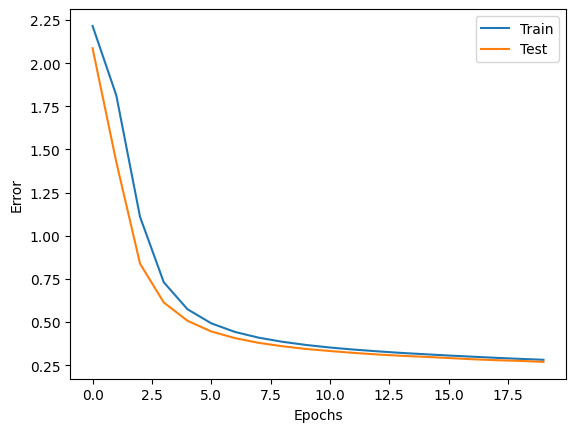

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

## 正解率
モデルの性能を把握するため、テストデータ使い正解率を測定する

In [ ]:
correct = 0
total = 0
net.eval()
for i, (x, t) in enumerate(test_loader):
  x, t = x.cuda(), t.cuda()  # GPU対応
  x = x.view(-1, 784)
  with torch.no_grad():
    y = net(x)
  correct += (y.argmax(1) == t).sum().item()
  total += len(x)
print("正解率:", str(correct/total*100) + "%")

正解率: 92.36999999999999%


## `model.eval()`と`torch.no_grad()`について

### `model.eval()`

`.eval()`はevalモードでの動作でBatch Normalization(Normを含むnn.Moduleの層)やDropoutなどが評価用として動作する

- これらの方法を用いた時の評価では評価結果に影響するため必須
- Batch Normalizationを含むNormalizationについてはCNNで詳細説明します

### `torch.no_grad()`

一般に、
```
with torch.no_grad:
  modelの評価コード
```
といった利用の仕方となる

- PyTorchは計算履歴を変数に保存するため、GPUを利用する場合、GPUメモリを浪費し、実行できなくなる場合がある
  - train時やforward計算時に勾配計算用パラメータを保存することでbackward計算を高速化するautograd機能のため

- autogradを無効化し、メモリ使用量を減らして計算速度を向上させる
  - 必須ではなく、無くても評価結果に影響しない
  - メモリサイズがおよそ1/5になるため、GPUでは5倍といった大きなバッチを組むことができる
  - CPUはメモリが比較的十分にあり、全てのモデルが基本メモリ上で動作させるため、その効果は微妙になるといえる

- 計算履歴を保存する必要がない場合、例えばbackwordが必要ない検証などは、保存しない設定で計算するとよい

- optimizer.zero_grad()を呼び出す必要がなくなる
  - そもそも評価時なので不必要

### `torch.no_grad`の具体例

ついでに、```with torch.no_grad():```とするのと```torch.set_grad_enabled(False)```とするのが違うことも示す

訓練時は勾配計算が必要であるが、評価時は不要である

その時、
```
torch.set_grad_enabled(False);
model.eval();

```
とすると、計算記録の追加は行われないが、過去の計算記録は残っているので、処理速度は速くなるが、メモリ占有量は変わらない

次に、
```
with torch.no_grad():
  model.eval()
```
とすると、記録すらもなくなるため、メモリ占有量も減る

> withの用法について
>
> withは、開始と終了がセットになった処理を行うという一般的な説明がされているが、より具体的には、デストラクタの呼び出しが曖昧なガベージコレクト型言語のpythonについて、明示的にデストラクタを呼び出すことを意味している
>
> ```
with open('filename', 'w', opener=opener) as f:
    print('test', file=f)
```
> などとして使う
>
> printが実行されるとデストラクタが明示的に呼び出され、fのメソッドとしてのデストラクタ、つまりcloseが呼び出されるため実質close不要となる

### パラメータの変更について

それ以外に、例えば、学習途中で、強制的に重みを変える、消失しそうだから、2倍にしたいとする(そういうことをする意味があるかどうかはさておき)

```
for param in model.parameters():
  param.data *= 2.0
```
これは、lossの勾配を計算する際にエラーになる

つまり、2倍するという計算の履歴すらも記録されてしまうからである

次のようにするとよい
```
with torch.no_grad():
  for param in model.parameters():
    param.data *= 2.0
```
自ら正規化規則を記述するんだ、という場合は参考になるかもしれないが、お勧めできる手法ではない

# PyTorchにおけるクロスエントロピーについて

PyTorchのCrossEntropyLoss関数には癖があるのでここで説明する

まず、PyTochにおける正解となるターゲットの記述の仕方に注意する
- One-hotで正解が3(ここでは0から数えて2)であるoutputと、正解ラベルである3(これも2)を格納したtargetを準備する

まず、どちらも、**配列の1つの要素として**、one-hotの値や2が格納されていることに注意する
- 複数の演算を同時に行う必要から、配列の要素として扱う
  - 今は一つであるが、複数入れるとそれぞれで計算してくれる
- このあたりの配列の扱いに慣れていないと、すぐにパニックに陥る
- 動いている例を見つけたら、typeやshapeにより型をきちんとしらべること

もう一つ、outputはFloatTensor、targetはLongTensorであることに注意すること
- ニューラルネットワークの出力は通常FloatTensorで、正解ラベルは通常整数であることから、このようになっている
  - 親切からそうなっているが、何も考えないで用いるとトラブルの要因の一つになりうる

なお、FloatTensorを用いているが、`torch.Tensor([[0,0,1]]).to(dtype=torch.long)`というようにtoで変換してもよく、floatであれば`dtype=torch.float`となる


In [ ]:
import torch
import torch.nn as nn
import numpy as np

output = torch.FloatTensor([[0,0,1]])
target = torch.LongTensor([2])
print(output, target)

tensor([[0., 0., 1.]]) tensor([2])


この場合、定義通りクロスエントロピーロスを計算しようとすると、次のようになる

但し、極端な出力のため、$log 0$は計算できず、そのまま省略している
$$Loss(p,q)=-\sum_i{p_i log q_i}$$

必要な箇所だけ計算すると、

In [ ]:
-(1*np.log(1))

np.float64(-0.0)

となり、つまり0である

しかしながら、PyTorchのクロスエントロピーは異なる値となる

In [ ]:
crossentropy = nn.CrossEntropyLoss()
crossentropy(output, target)

tensor(0.5514)

なお、本来は`[0,0,1]`といった美しい確率分布になるような出力値がNNから得られることはまずない。
- これを確率とするには、一度Softmaxを介さなければならない

次のような例でも問題ないことを考えれば、より分かりやすいのではないだろうか

outputは、`[0,0,1]`としているが、別に次のような値でも構わない
- ニューラルネットワークからの出力は0から1の値とは限らず、理論的には実数域すべてを想定できる
- 配列の最後の要素がとびぬけていると値が小さくなる。

In [ ]:
output2 = torch.FloatTensor([[2.0,35.2,-13.7]])
print(crossentropy(output2, target))
output3 = torch.FloatTensor([[2.0, -13.7, 35.2]])
print(crossentropy(output3, target))

tensor(48.9000)
tensor(0.)


さて、PyTorchのCrossEntropyLoss()の出力値が、実際のクロスエントロピーの定義に基づく式の演算結果と異なるのは、PyTorchのCrossEntropyLoss()は、Softmax()とNLLLoss()の合成で計算されるためである

確認しよう
- まず、Softmaxの結果だけみてみよう

In [ ]:
softmax = nn.Softmax(dim=1) # dim=1を忘れるとワーニングが出る
softmax(output)

tensor([[0.2119, 0.2119, 0.5761]])

この結果のlogを取り、NLLLossを計算する

NLLLossは、この例では$$-x[class]$$を計算するだけの関数
- 実際には、まとめて計算するため複数の要素が投入されるが、それらすべての平均を計算してくれる関数
- ミニバッチの場合、まとめて計算し、その平均でパラメータを更新するが、そのためにある関数

In [ ]:
nllloss = nn.NLLLoss()
nllloss(torch.log(softmax(output)), target)

tensor(0.5514)

このように答えが一致した

つまり、もともとのクロスエントロピーの定義に基づけば、`nsloss(torch.log(output), target)` となる

しかしながら実際の利用において、この形単独で利用するケースは限られることからPyTorchではsoftmax関数が内包されている

さて、CrossEntropyを利用するのと、Softmax+log+NLLとするのと同じだから、どちらでもよいではないか？ということになりそうであるが、そうではない。

専用関数は次のような恩恵に預かることができる

- exp-normalize trickの恩恵を最大化するのは、CrossEntropyで一気にやる方法であること
- 内部で最適化されていること

この、exp-normalize trickについて簡単に説明する

普通にsoftmaxを定義通り計算すると、
$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}
$$
となるが、$e^x$が大きすぎ、計算機上での計算において、計算結果がオーバーフローする可能性がある

そこで、値を小さくして計算する手法として、
$$
e^{x_i}\cdot e^{-b}\cdot e^{b}=e^{x_i-b}\cdot e^{b}
$$
となることから、
$$
\text{softmax}(x_i) = \frac{e^{x_i-b}e^{b}}{\sum_j e^{x_j-b}e^{b}} = \frac{e^{x_i-b}}{\sum_j e^{x_j-b}}
$$
として計算しても同じ答えとなることがわかる

PyTorchは、これらの処理も自動的に行っている

log_softmaxについても同様で、log-sum-expと呼ばれる、名前だけ変わってやっていることは変わらないテクニックがある

$$
\begin{align}
\text{log_softmax}(x_i) &= \log\left(\frac{e^{x_i}}{\sum_j e^{x_j}}\right)\\
&= x_i - \log \left( \sum_j e^{x_j} \right) \\
&= x_i - \log \left( \sum_j e^{x_j - b}e^b \right) \\
&= x_i - \log \left( \sum_j e^{x_j - b} \right) - b \\
\end{align}
$$

つまり、なお、`torch.nn.CrossEntropy=torch.nn.LogSoftmax＋torch.nn.NLLLoss`という関係にある

とにかく、複合関数を使わないと、予期せぬ落とし穴にはまることがある


# PyTorchの活性化関数

PyTorchでは、以下の活性化関数が用意されている

ELU, Hardshrink, Hardtanh, LeakyReLU, LogSigmoid, MultiheadAttention, PReLU, ReLU, ReLU6, RReLU, SELU, CELU, GELU, Sigmoid, Softplus, Softshrink, Softsign, Tanh, Tanhshrink, Threshold, Softmin, Softmax, Softmax2d, LogSoftmax, AdaptiveLogSoftmaxWithLoss

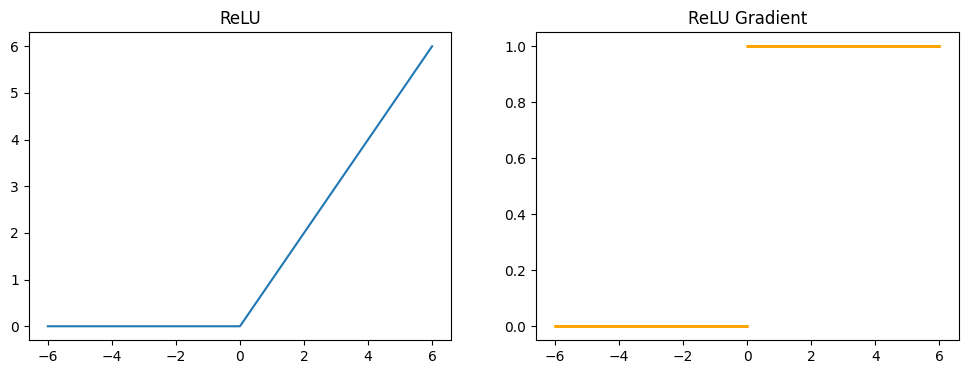

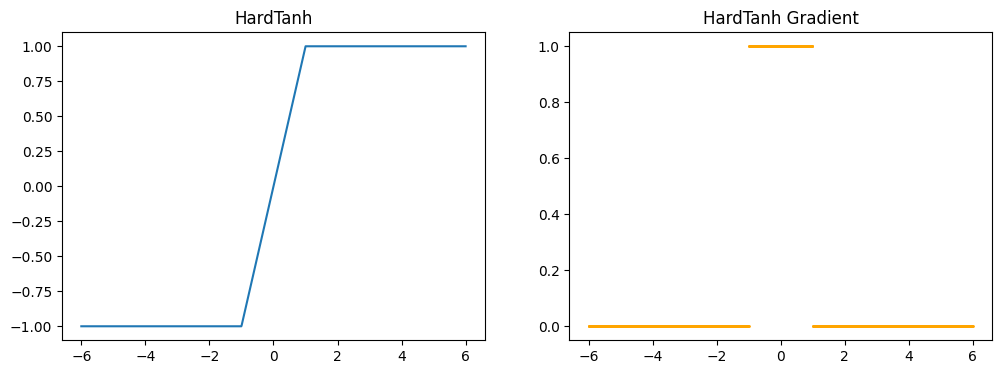

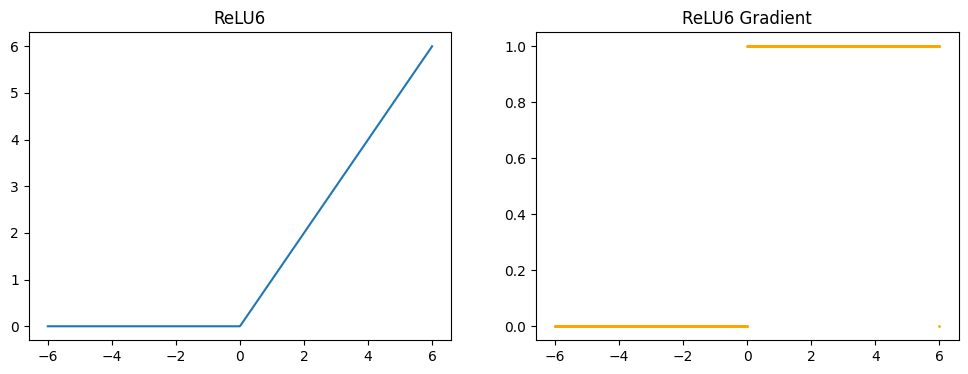

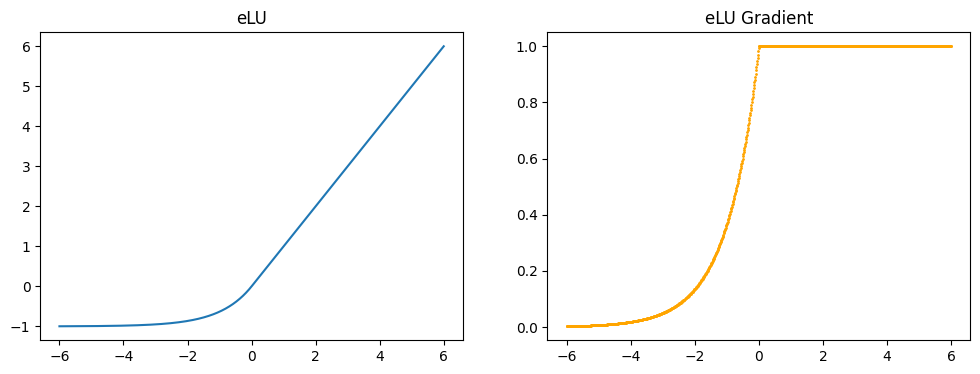

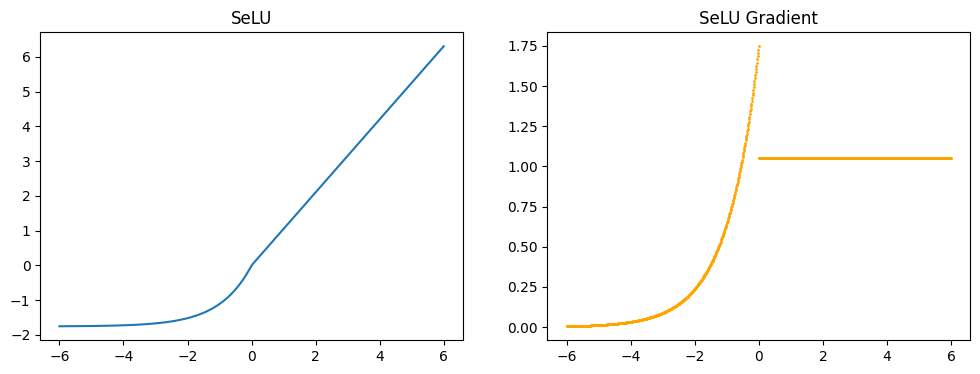

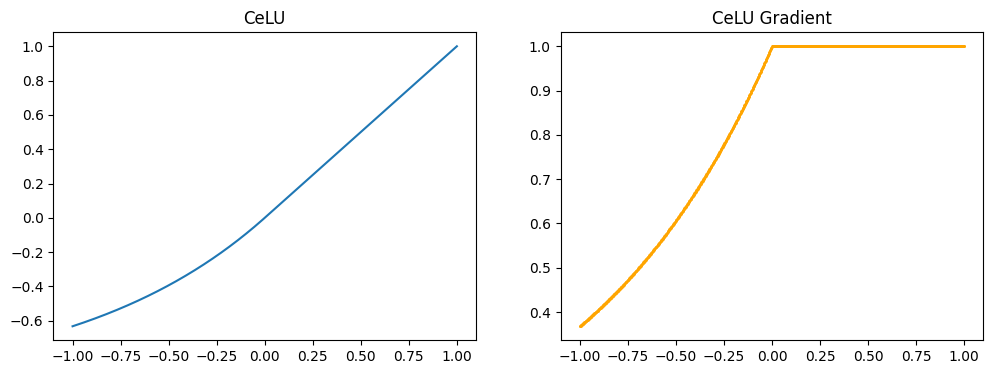

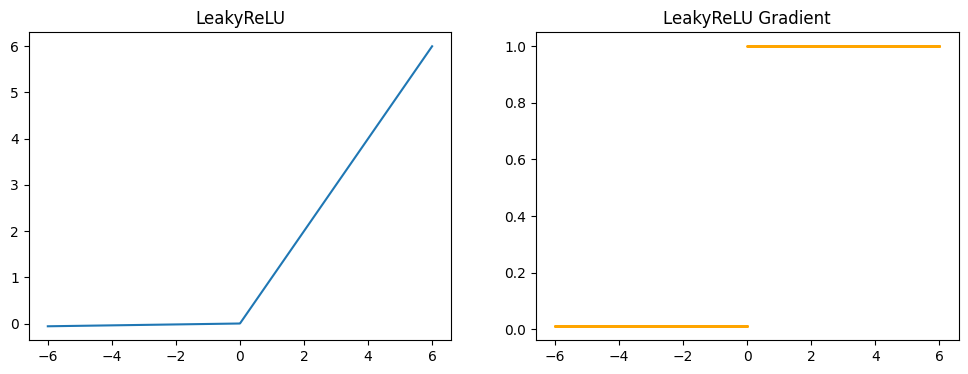

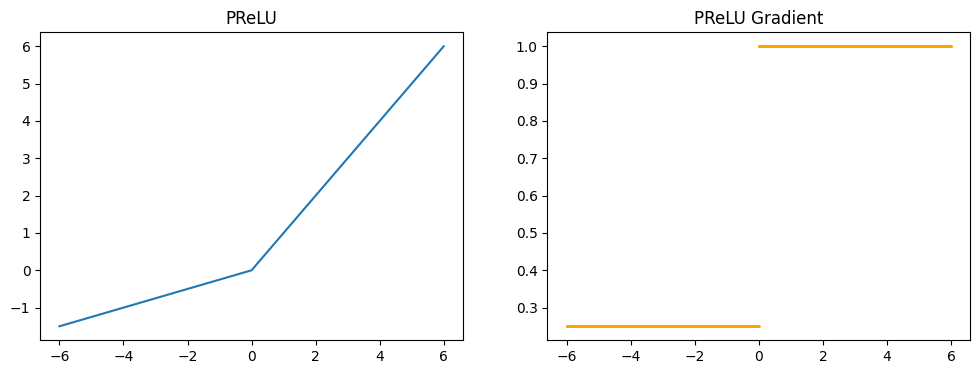

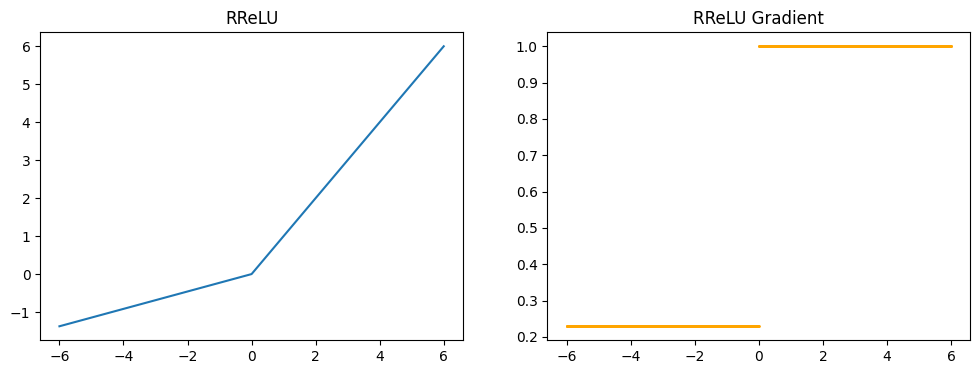

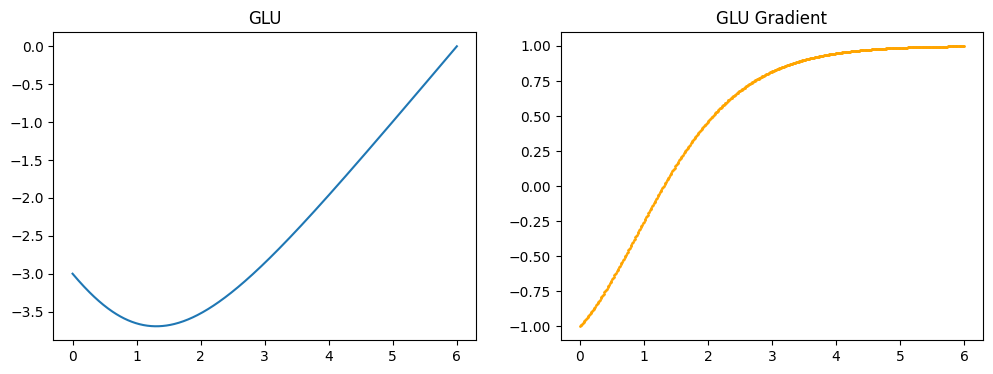

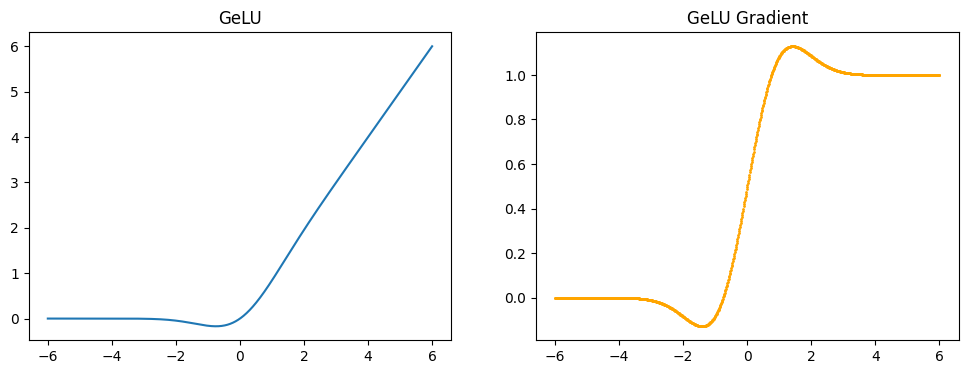

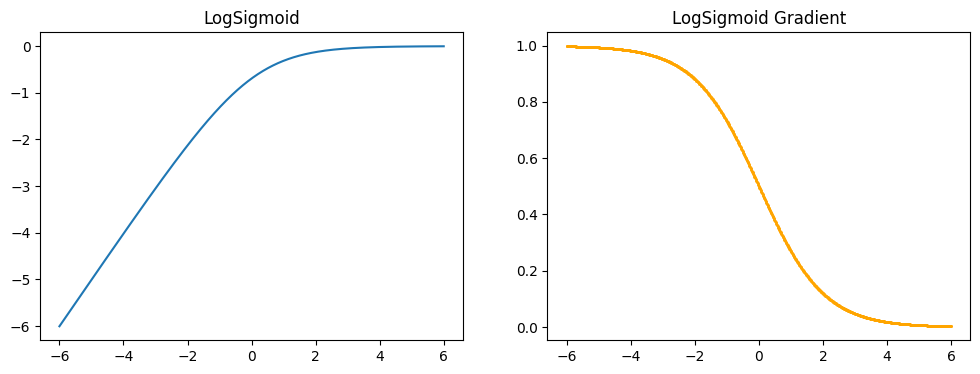

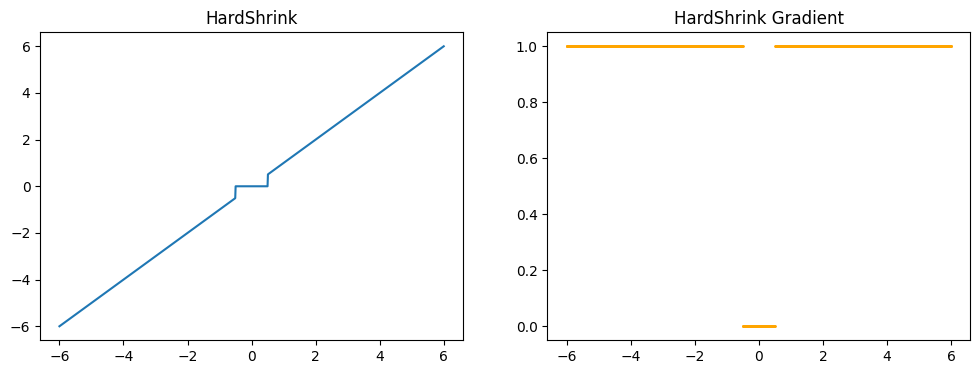

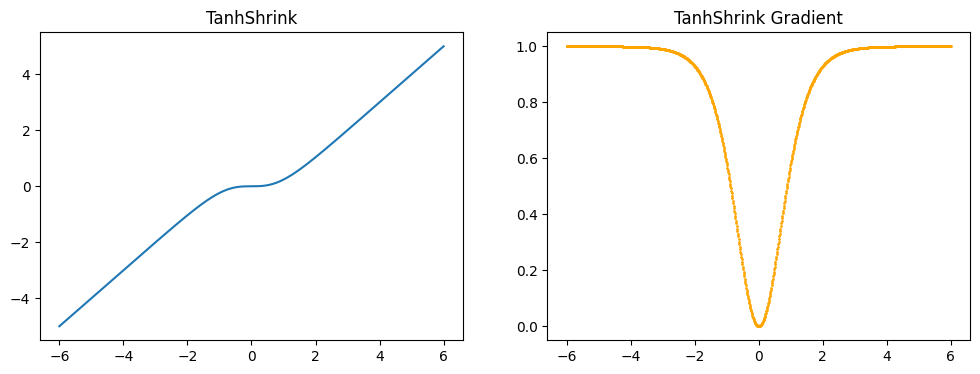

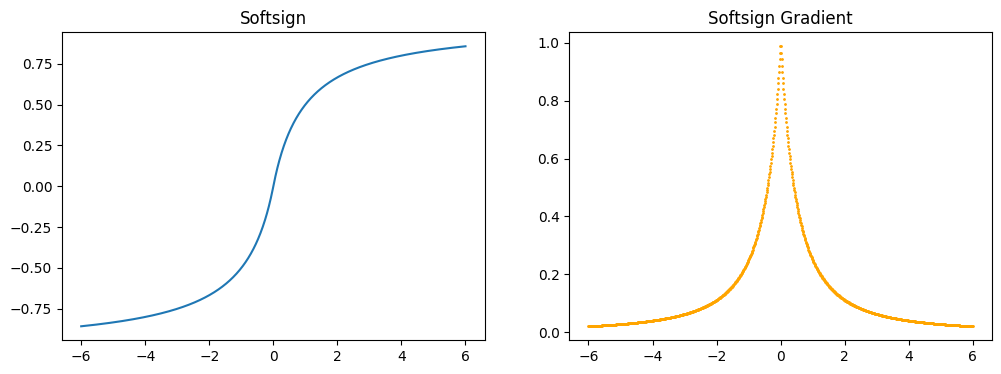

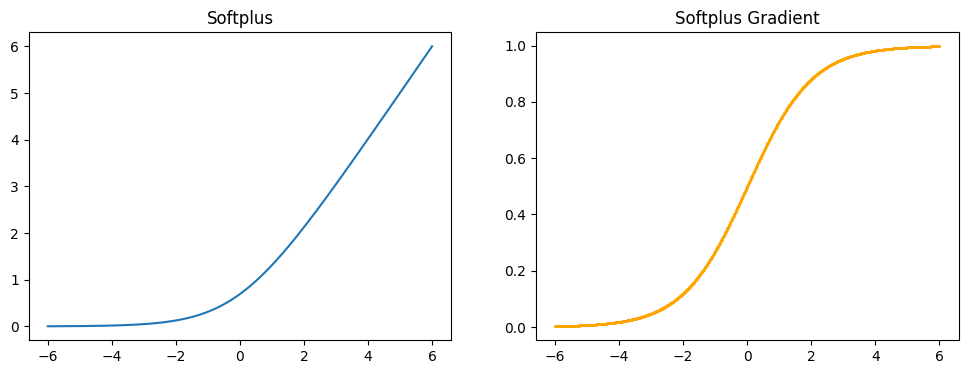

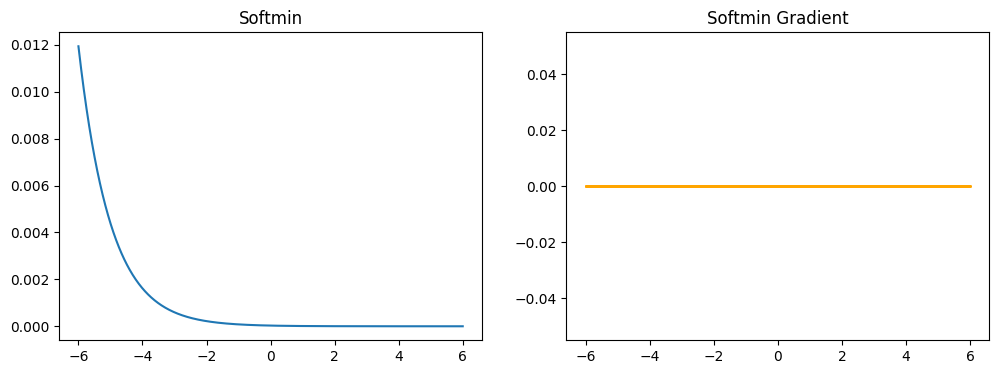

/tmp/ipython-input-1460018492.py:124: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  y=F.softmax(x)


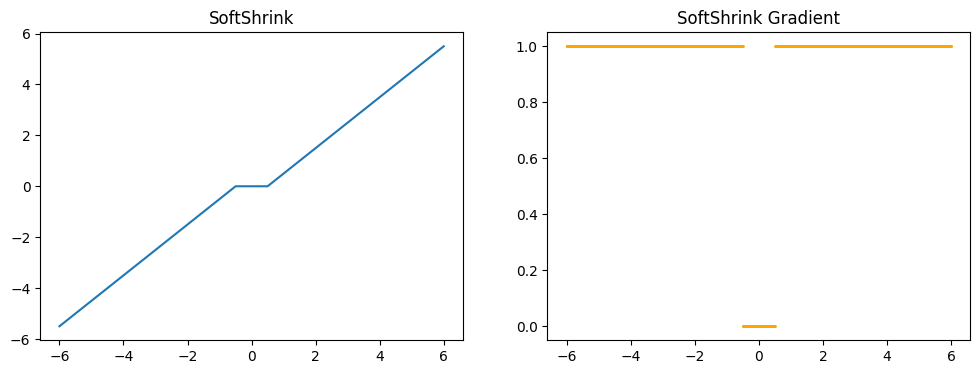

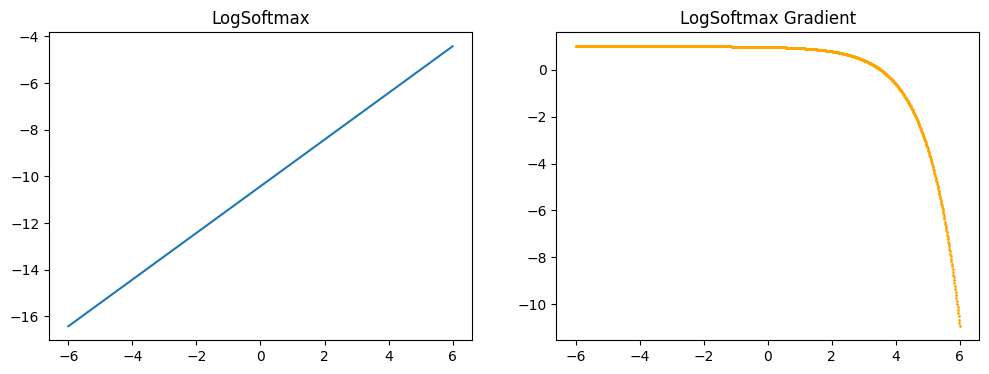

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
def drawGraph(x, y, y_dash, title):
  fig = plt.figure(figsize=(12, 4))
  ax1 = fig.add_subplot(1, 2, 1)
  ax2 = fig.add_subplot(1, 2, 2)
  ax1.plot(x, y)
  ax2.scatter(x, y_dash, s=1, color='orange')
  ax1.set_title(title)
  ax2.set_title(title+' Gradient')
  plt.show()
x=torch.linspace(-6, 6, 1000, dtype=torch.float, requires_grad=True)
y=F.relu(x)
z=y.sum()
z.backward()
z_dash=x.grad
drawGraph(x.detach().numpy(), y.detach().numpy(), z_dash.detach().numpy(), 'ReLU')
x=torch.linspace(-6, 6, 1000, dtype=torch.float, requires_grad=True)
y=F.hardtanh(x)
z=y.sum()
z.backward()
z_dash=x.grad
drawGraph(x.detach().numpy(), y.detach().numpy(), z_dash.detach().numpy(), 'HardTanh')
x=torch.linspace(-6, 6, 1000, dtype=torch.float, requires_grad=True)
y=F.relu6(x)
z=y.sum()
z.backward()
z_dash=x.grad
drawGraph(x.detach().numpy(), y.detach().numpy(), z_dash.detach().numpy(), 'ReLU6')
x=torch.linspace(-6, 6, 1000, dtype=torch.float, requires_grad=True)
y=F.elu(x)
z=y.sum()
z.backward()
z_dash=x.grad
drawGraph(x.detach().numpy(), y.detach().numpy(), z_dash.detach().numpy(), 'eLU')
x=torch.linspace(-6, 6, 1000, dtype=torch.float, requires_grad=True)
y=F.selu(x)
z=y.sum()
z.backward()
z_dash=x.grad
drawGraph(x.detach().numpy(), y.detach().numpy(), z_dash.detach().numpy(), 'SeLU')
x=torch.linspace(-1, 1, 1000, dtype=torch.float, requires_grad=True)
y=F.celu(x)
z=y.sum()
z.backward()
z_dash=x.grad
drawGraph(x.detach().numpy(), y.detach().numpy(), z_dash.detach().numpy(), 'CeLU')
x=torch.linspace(-6, 6, 1000, dtype=torch.float, requires_grad=True)
y=F.leaky_relu(x)
z=y.sum()
z.backward()
z_dash=x.grad
drawGraph(x.detach().numpy(), y.detach().numpy(), z_dash.detach().numpy(), 'LeakyReLU')
x=torch.linspace(-6, 6, 1000, dtype=torch.float, requires_grad=True)
y=F.prelu(x, torch.tensor([0.25]))
z=y.sum()
z.backward()
z_dash=x.grad
drawGraph(x.detach().numpy(), y.detach().numpy(), z_dash.detach().numpy(), 'PReLU')
x=torch.linspace(-6, 6, 1000, dtype=torch.float, requires_grad=True)
y=F.rrelu(x)
z=y.sum()
z.backward()
z_dash=x.grad
drawGraph(x.detach().numpy(), y.detach().numpy(), z_dash.detach().numpy(), 'RReLU')
x=torch.linspace(-6, 6, 1000, dtype=torch.float)
y=F.glu(x)

# xを2つに分解する
x1=torch.linspace(-6, 0, 500, dtype=torch.float, requires_grad=True)
x2=torch.linspace(0, 6, 500, dtype=torch.float, requires_grad=True)
y=torch.mul(x1, torch.sigmoid(x2))
z=y.sum()
z.backward()
#x1 x2 で自動微分
z_dash1=x1.grad
z_dash2=x2.grad
z_dash3=torch.add(z_dash1, z_dash2)
drawGraph(x2.detach().numpy(), y.detach().numpy(), z_dash3.detach().numpy(), 'GLU')
x=torch.linspace(-6, 6, 1000, dtype=torch.float, requires_grad=True)
y=F.gelu(x)
z=y.sum()
z.backward()
z_dash=x.grad
drawGraph(x.detach().numpy(), y.detach().numpy(), z_dash.detach().numpy(), 'GeLU')
x=torch.linspace(-6, 6, 1000, dtype=torch.float, requires_grad=True)
y=F.logsigmoid(x)
z=y.sum()
z.backward()
z_dash=x.grad
drawGraph(x.detach().numpy(), y.detach().numpy(), z_dash.detach().numpy(), 'LogSigmoid')
x=torch.linspace(-6, 6, 1000, dtype=torch.float, requires_grad=True)
y=F.hardshrink(x)
z=y.sum()
z.backward()
z_dash=x.grad
drawGraph(x.detach().numpy(), y.detach().numpy(), z_dash.detach().numpy(), 'HardShrink')
x=torch.linspace(-6, 6, 1000, dtype=torch.float, requires_grad=True)
y=F.tanhshrink(x)
z=y.sum()
z.backward()
z_dash=x.grad
drawGraph(x.detach().numpy(), y.detach().numpy(), z_dash.detach().numpy(), 'TanhShrink')
x=torch.linspace(-6, 6, 1000, dtype=torch.float, requires_grad=True)
y=F.softsign(x)
z=y.sum()
z.backward()
z_dash=x.grad
drawGraph(x.detach().numpy(), y.detach().numpy(), z_dash.detach().numpy(), 'Softsign')
x=torch.linspace(-6, 6, 1000, dtype=torch.float, requires_grad=True)
y=F.softplus(x)
z=y.sum()
z.backward()
z_dash=x.grad
drawGraph(x.detach().numpy(), y.detach().numpy(), z_dash.detach().numpy(), 'Softplus')
x=torch.linspace(-6, 6, 1000, dtype=torch.float, requires_grad=True)
y=F.softmin(x,  0)
z=y.sum()
z.backward()
z_dash=x.grad
drawGraph(x.detach().numpy(), y.detach().numpy(), z_dash.detach().numpy(), 'Softmin')
x=torch.linspace(-6, 6, 200, dtype=torch.float)
y=F.softmax(x)
x=torch.linspace(-6, 6, 1000, dtype=torch.float, requires_grad=True)
y=F.softshrink(x)
z=y.sum()
z.backward()
z_dash=x.grad
drawGraph(x.detach().numpy(), y.detach().numpy(), z_dash.detach().numpy(), 'SoftShrink')
x=torch.linspace(-6, 6, 1000, dtype=torch.float, requires_grad=True)
y=F.log_softmax(x, 0)
z=y.sum()
z.backward()
z_dash=x.grad
drawGraph(x.detach().numpy(), y.detach().numpy(), z_dash.detach().numpy(), 'LogSoftmax')


# Pytorchの最適化手法

次のような最適化手法があり、その基本は既に学習済である
- SGD : torch.optim.SGD
- Adagrad : torch.optim.Adagrad
- RMSprop : torch.optim.RMSprop
- Adadelta : torch.optim.Adadelta
- Adam : torch.optim.Adam
- AdamW : torch.optim.AdamW

これらについて、関数$f(x,y)=x^2+y^2$ 平面上での最適化過程を比較する
- なお次のようなグラフであり、この底へ向かわせる

In [ ]:
def func(x, y):
  return x**2+y**2

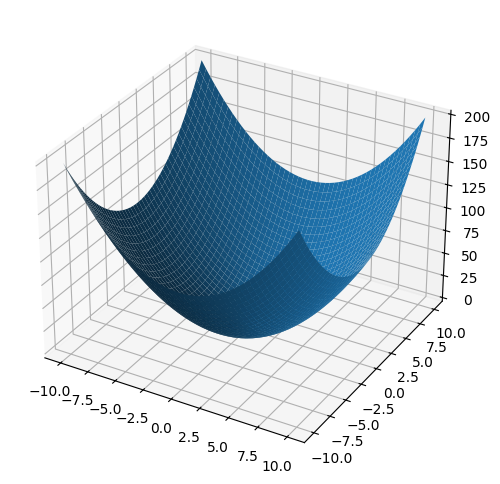

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x = y = np.linspace(-10, 10)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')  # 3D描画機能を持ったサブプロット作成
ax.plot_surface(X, Y, Z)   # 曲面を描画した3Dグラフを表示

Optimizer:SGD
Optimizer:Adagrad
Optimizer:RMSprop
Optimizer:Adadelta
Optimizer:Adam
Optimizer:AdamW


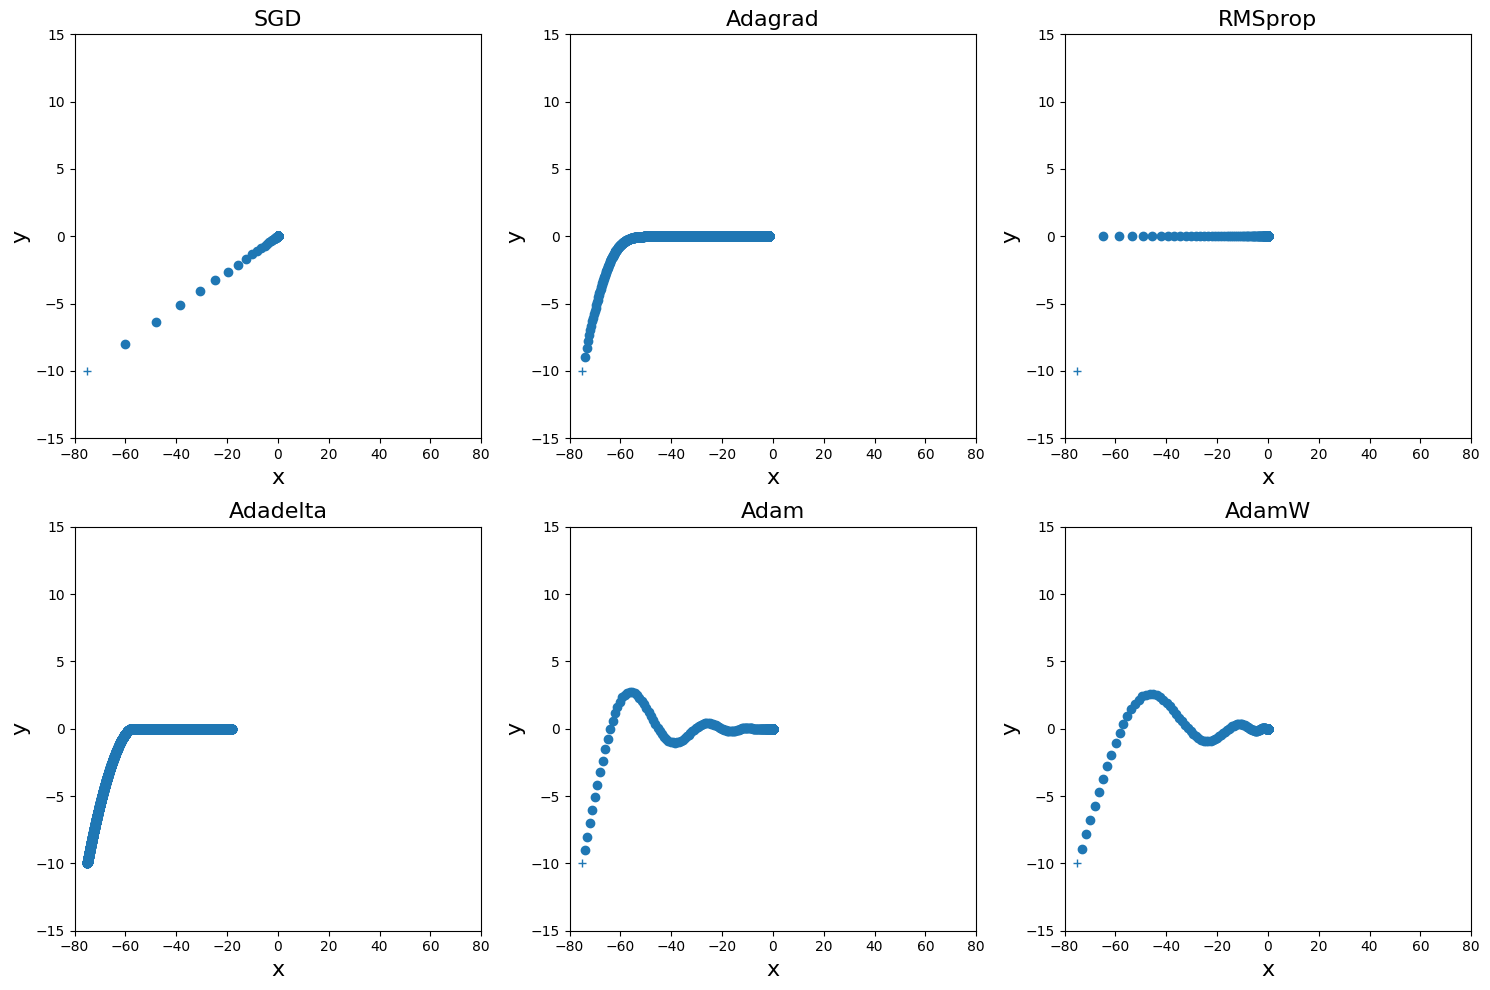

In [ ]:
import torch
from torch import optim
import matplotlib.pyplot as plt
import numpy as np
# 次の全ての最適化手法を試すため名前をリストに登録
classes = ['SGD', 'Adagrad', 'RMSprop', 'Adadelta', 'Adam', 'AdamW']
x_list = {}
y_list = {}
f_list = {}
optimizers = {}
# それぞれの最適化手法毎に配列を準備
for key in classes:
  x_list[key] = []
  y_list[key] = []
  f_list[key] = []
# 各最適化手法を用いて実際に最適化を行う
for key in classes:
  print("Optimizer:"+key)
  # 初期値(最適化を行う最初の場所)を統一しておく
  x = torch.tensor(-75.0, requires_grad=True)
  y = torch.tensor(-10.0, requires_grad=True)
  params = [x, y]
  # 学習率（SGDはいきなり最適に向かってしまう好都合な条件のため0.1とする）
  optimizers['SGD'] = optim.SGD(params, lr=0.1)
  optimizers['Adagrad'] = optim.Adagrad(params, lr=1.0)
  optimizers['RMSprop'] = optim.RMSprop(params, lr=1.0)
  optimizers['Adadelta'] = optim.Adadelta(params, lr=1.0)
  optimizers['Adam'] = optim.Adam(params, lr=1.0)
  optimizers['AdamW'] = optim.AdamW(params, lr=1.0)
  for i in range(5000): # 繰り返し
    # Autogradを用いて勾配を求めてoptimizerで更新する
    optimizers[key].zero_grad()
    outputs = func(x, y)
    outputs.backward()
    optimizers[key].step()
    x_list[key].append(x.item())
    y_list[key].append(y.item())
    f_list[key].append(outputs.item())
# 結果のグラフ作成
fig = plt.figure(figsize=(15, 10))
for i, key in enumerate(classes):
  ax = fig.add_subplot(2, 3, i+1)
  ax.scatter(x_list[key], y_list[key])
  ax.plot(-75, -10, '+')
  ax.set_title(key, fontsize=16)
  ax.set_xlabel('x', fontsize=16)
  ax.set_ylabel('y', fontsize=16)
  ax.set_xlim(-80, 80)
  ax.set_ylim(-15, 15)
plt.tight_layout()
fig.show()

これらのグラフは、丁度先に示した3Dの図を上から見た時の移動を示している
- (x,y)=(0,0)が最小値でここに向かう過程を示している

## SGD（Stochastic Gradient Decent : 確率的勾配降下法）

代表的な最適化手法で、求めた勾配方向に求めた大きさだけパラメータを更新する

Pytorchでは、MomentumといったSGCの改良アルゴリズムを利用する場合、`torch.optim.SGD()`のパラメータに指定する
- パラメータには momentum、 dampening、 nesterovなどを指定できる

`torch.optim.SGD(params, lr=<required parameter>, momentum=0, dampening=0, weight_decay=0, nesterov=False)`

欠点：複雑な状況では最適化が進みにくくなる

## Adagrad（Adaptive Gradient Algorithm）

学習率を学習過程の中で更新する手法
- パラメータの更新度合いで次の学習率を各パラメータ毎に調整
  - 大きく更新されたパラメータの学習率をより小さく調整
  - 大きな勾配の影響が小さくなり、効率的に最適化を行う

欠点：学習が進むと学習率が小さくなり更新されなくなる

## RMSprop（Root Mean Square propagation）

勾配情報をAdagrad同様に記憶するが、古い情報を落として、新しい勾配情報がより反映されるように工夫されている
- 学習が進んでも学習率の調整を適切に行う

## Adadelta

AdagradやRMSpropがパラメータを勾配の単位で更新する点を改良している
- 過去の更新量の移動平均を過去の勾配の移動平均で割り、さらに現在の勾配を掛けた値を更新量とする
- つまり、常に同じ単位で更新される
- 学習率の設定が不要

欠点：収束がやや遅い

## Adam（Adaptive Moment Estimation）

MomentumとAdagradを併せ持つ

蛇行して効率が悪いように見えるかもしれないが、複雑な形状ではよりよい方向を適切に探し出すことができる場合がある

## AdamW

Adamの Weight decay（重み減衰）に関する式に変更を加えている
- 損失関数計算時およびパラメータ更新時にL2 正則化項を追加
- Adamよりも適切な Weight decay を与える

# Pytorchのロス関数

すでに扱った内容であるが、重要なので以下のようにまとめる
  - $L$:損失関数, $y$:推論値, $t$:正解データ, $B$:バッチサイズ, $w$:重み, $t_i$:正解ラベル[1,0], $p_i$:確率 とする

| 問題例 | 損失関数 | 概要 | 計算式 |
| ---- | ---- | ----- | ----- |
| 回帰 | nn.MSELoss	| 平均二乗誤差 | $$L(y,t)=\frac{1}{B}\sum^B_{i=1}(y_i−t_i)^2$$ |
| 回帰 | nn.L1Loss | 平均絶対値誤差 | $$ L(y,t)=\frac{1}{B}\sum^B_{i=1}|y_i−t_i| $$ |
| 二値分類 | nn.BCELoss	| バイナリクロスエントロピー | $$L(y,t)=−=\frac{1}{B}\sum^B_{i=1}(w_i(t_i \cdot \log(p_i)+(1−t_i)\cdot \log(1−p_i)))$$ |
| 二値分類 | nn.BCEWithLogitsLoss	| ロジット・バイナリクロスエントロピー | $$L(y,t)=-\frac{1}{B}\sum^B_{i=1}(w_i(t_i\cdot \log(Sigmoid(y_i))+(1−t_i)\cdot \log(1−Sigmoid(y_i))))$$ |
| 多クラス分類 | nn.CrossEntropyLoss | Softmaxクロスエントロピー誤差 | $$L(y,t)
=−\frac{1}{B}\sum ^B_{i=1}\frac{\sum^{N−1}_{k=0}w^k \cdot t_i^k \cdot y_i^k}{\sum^{N−1}_{j=0} \exp(y_j^k)}$$ |

- ロジット(Logits)  
一般に、深層機械学習においては、ソフトマックス活性化関数に通す前のニューラルネットワークの出力のことを指す
  - 狭義には次のような場合にも利用する  
確率$P$に対し、事象が発生しない確率との比$P^{-1}−P$を「オッズ」と呼び、 更にこの$\log$をとった値、つまり$$logit(P)=\log(P^{-1}−P)=\log(P)−\log(1−P)$$のことで、ロジスティック関数の逆関数でもある

- ロジット・バイナリクロスエントロピー
  - Sigmoid 層と BCELoss を1つのクラスにまとめており、個別に利用するよりも数値的に安定する
  - 数値安定性のためにlog-sum-expトリックを利用するため

$$L(y,t)=−\frac{1}{B}\sum^B_{i=1}\frac{\sum^{N−1}_{k=0}w^k・t_i^k\cdot \log(\exp(y_i^k))}{\sum^{N−1}_{j=0} \exp(y_j^k)}
=
−\frac{1}{B}\sum ^B_{i=1}\frac{\sum^{N−1}_{k=0}w^k \cdot t_i^k \cdot y_i^k}{\sum^{N−1}_{j=0} \exp(y_j^k)}$$

実験してみよう

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import numpy as np
from matplotlib import pyplot as plt

# MSELoss
x = torch.randn(4)
y = torch.randn(4)
print("x: ",x)
print("y: ",y)
criterion = nn.MSELoss()
loss = criterion(x, y)
print("MSELoss: ",loss)

# L1Loss
criterion = nn.L1Loss()
loss = criterion(x, y)
print("L1Loss: ",loss)

# CrossEntropyLoss
x = torch.randn(1, 4)
y = torch.LongTensor([1]).random_(4)
criterion = nn.CrossEntropyLoss()
loss = criterion(x, y)
print("CrossEntropyLoss: ",loss)

x:  tensor([ 0.4194, -0.3357, -0.5811,  1.3369])
y:  tensor([ 0.5869, -0.4555,  1.1787,  1.3165])
MSELoss:  tensor(0.7849)
L1Loss:  tensor(0.5169)
CrossEntropyLoss:  tensor(2.7870)


# 課題1(pytorch演算の基本)
```
import torch
x = torch.arange(12)
x

```
として生成されたx`tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])`を用いて次のtorch.tensorのリストをワンライナー(1行のpythonコード)で作成しなさい

- 2つづつグループに  
`tensor([[ 0,  1],[ 2,  3],[ 4,  5],[ 6,  7],[ 8,  9],[10, 11]])`
  - なお、出力の形が同一であればよく、途中で改行されているなどの書式は問いません(意味がありません)

- 2つづつグループにした各グループの先頭の値のみ集める  
`tensor([ 0,  2,  4,  6,  8, 10])`

- 2つづつグループにした各グループをさらに1要素次元に  
`tensor([[[ 0,  1]],[[ 2,  3]],[[ 4,  5]],[[ 6,  7]],[[ 8,  9]],[[10, 11]]])`
- 2つづつグループにしたテンソル全体を要素に含むテンソルに(reshapeを使って)  
`tensor([[[ 0,  1],[ 2,  3],[ 4,  5],[ 6,  7],[ 8,  9],[10, 11]]])`

- 2つづつグループにしたテンソル全体を要素に含むテンソルに(unsqueezeを使って)
  - こちらは要素数が不明であるときに便利です  
答えの形は同じです

- 各要素を二乗  
`tensor([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])`
  - とてもシンプルにできます

- 偶数要素は0に、奇数要素はそのまま  
`tensor([ 0,  1,  0,  3,  0,  5,  0,  7,  0,  9,  0, 11])`
  - ここまでくると、それなりにテクニックが必要です
  - ヒント: この場合は流石にlambdaを利用したいと考えるかと思いますので、numpy形式に変換してもう一度直すと考えると答えにたどり着きます

# 課題2(TorchTensor)

**問題1**

次のようなPyTorchテンソル t を作成しなさい
`print(t)`とすると、
```
tensor([[[  1,   2],
         [  4,   5],
         [  7,   8]],

        [[ -1,  -2],
         [ -4,  -5],
         [ -7,  -8]],

        [[ 10,  20],
         [ 40,  50],
         [ 70,  80]],

        [[-10, -20],
         [-40, -50],
         [-70, -80]]])
```
と返す

**問題2**

tの大きさをsizeメソッドを使って確認しなさい

**問題3**

`print(t[:,-1,:])`
の出力結果を記すと共に、なぜその結果になるかを説明しなさい

**問題4**

`print(t[:-1:])`
の出力結果を記すと共に、なぜその結果になるかを説明しなさい

**問題5**

問題4に対して、`t[]`の中に**数字を2箇所にだけ書き足す**ことで同じ出力結果が得られるようにしなさい

要するに問題5は、省略形であるので、省略なしに記しなさいということである
- 単純に何の省略か？という問題にすると答えが複数現れるため、あえてこのような問いにしている

# 課題3(Autograd)

$y = 2x^3-3x^2-12x+1$を求める関数f(def文で、def f(x):などとする)を定義し、$x=1$の時の導関数の値をPyTorchのautograd機能を利用して計算しなさい

また、手計算で結果が正しいことを確認しなさい
- 数式は、数式モードでノートブックに記述すること
- 手書きや手書きキャプチャ、Powerpointのキャプチャ、(プログラム形式も含めて)テキストで記述した数式などは認めない

# その他PyTorch操作

以下、知っていると得する操作を纏める

## 数値丸め

In [ ]:
a = torch.rand(2, 2)*10-5
print(a)
print("絶対値\n", torch.abs(a))
print("切り上げ\n", torch.ceil(a))
print("切り下げ -1.8 -> -2\n", torch.floor(a))
print("四捨五入 -1.8 -> -1\n", torch.round(a))
print("小数点以下の切り捨て(0に近いほうへの丸め) -1.8 -> -1\n", torch.trunc(a))
print("小数点以下. 1.3 -> 0.3, -4.6 -> -0.6\n", torch.frac(a))
print("最小値と最大値でクリップ\n", torch.clamp(a,0, 1))

tensor([[3.2926, 0.5606],
        [3.1265, 2.4660]])
絶対値
 tensor([[3.2926, 0.5606],
        [3.1265, 2.4660]])
切り上げ
 tensor([[4., 1.],
        [4., 3.]])
切り下げ -1.8 -> -2
 tensor([[3., 0.],
        [3., 2.]])
四捨五入 -1.8 -> -1
 tensor([[3., 1.],
        [3., 2.]])
小数点以下の切り捨て(0に近いほうへの丸め) -1.8 -> -1
 tensor([[3., 0.],
        [3., 2.]])
小数点以下. 1.3 -> 0.3, -4.6 -> -0.6
 tensor([[0.2926, 0.5606],
        [0.1265, 0.4660]])
最小値と最大値でクリップ
 tensor([[1.0000, 0.5606],
        [1.0000, 1.0000]])


## 統計量を計算する

dimを指定しなければ、一つの長い配列とみなされる
- min, maxで違いを明確にしている

In [ ]:
print(a)
print(torch.mean(a, dim=1))

tensor([[3.2926, 0.5606],
        [3.1265, 2.4660]])
tensor([1.9266, 2.7962])


In [ ]:
val, idx = torch.median(a, 1)
print(val, idx)
print(torch.median(a))

tensor([0.5606, 2.4660]) tensor([1, 1])
tensor(2.4660)


In [ ]:
print(torch.mode(a,1))

torch.return_types.mode(
values=tensor([0.5606, 2.4660]),
indices=tensor([1, 1]))


In [ ]:
print(torch.std(a, unbiased=True)) # 標準偏差 不偏分散

tensor(1.2525)


In [ ]:
print(torch.std(a, unbiased=False)) # 標準偏差 不偏分散でない

tensor(1.0847)


In [ ]:
stddev, mean = torch.std_mean(a, unbiased=False) # 標準偏差と平均
print(stddev, mean)

tensor(1.0847) tensor(2.3614)


## ノルム/距離

- ノルム

In [ ]:
print(torch.norm(a))
print(torch.norm(a, dim=1, p='fro')) # frobenius norm

tensor(5.1973)
tensor([3.3400, 3.9820])


- 距離
  - 1ノルムやL2ノルムを得る
  - Lpノルムとして指定する

In [ ]:
b = torch.rand(2, 2)*10-5
print(torch.dist(a, b, p=1)) # L1ノルム
print(torch.dist(a, b, p=2)) # L2ノルム

tensor(15.8741)
tensor(9.1968)


##  累積和, 累積積、複合

- 累積和$\sum$

In [ ]:
b = torch.tensor([[1, 2, 3, 4, 5], [1, -1, 2, -2, 3]])
torch.cumsum(b, dim=1)

tensor([[ 1,  3,  6, 10, 15],
        [ 1,  0,  2,  0,  3]])

- 累積積$\prod$

In [ ]:
 torch.cumprod(b,1)

tensor([[  1,   2,   6,  24, 120],
        [  1,  -1,  -2,   4,  12]])

- log(sum(exp()))を計算

In [ ]:
torch.logsumexp(b,1)

tensor([5.4519, 3.4241])

## PyTorchの掛け算色々

良い機会なので、ここにPyTorchにおけるテンソルの掛け算関数を纏めておく。なお、matmal以外ブロードキャストされないので注意し、されないが故に種類も多いことに注意する

- torch.dot
  - 1次元のベクトル同士の積を計算、1次元×1次元専用

In [ ]:
torch.dot(torch.tensor([2, 3]), torch.tensor([2, 1]))

tensor(7)

- torch.mm
  - 2次元の行列同士の積を計算、2次元×2次元専用

In [ ]:
mat1 = torch.randn(2, 3)
mat2 = torch.randn(3, 3)
torch.mm(mat1, mat2)

tensor([[-0.0839,  0.8776, -0.8174],
        [-0.4052,  1.0149, -1.2758]])

- torch.mv
  - 2次元×1次元の積を計算、2次元×1次元専用


In [ ]:
mat = torch.randn(2, 3)
vec = torch.randn(3)
torch.mv(mat, vec)

tensor([-0.3406, -0.8351])

- torch.bmm
  - バッチごとに2次元×2次元の行列積を計算、つまり3次元x3次元
  - 従って、結果は3次元×3次元となる
  - 遅いという話もあるが改善されているので普通に使える


In [ ]:
batch1 = torch.randn(10, 3, 4)
batch2 = torch.randn(10, 4, 5)
res = torch.bmm(batch1, batch2)
res.size()

torch.Size([10, 3, 5])

- 複合掛け算
  - 流石に見たことがないので省略するが、マニュアルを見るとよい
  - torch.addbmm, torch.baddbmm, torch.addmm, torch.addmv, torch.addrなどがある

- torch.matmul
  - 一般に積を計算、掛けるテンソルと掛けられるテンソルにより様々な計算を行う万能選手、ブロードキャストも行う
  - 万能すぎて動作が複雑、最適化も謎、**マジでヤバイ torch.matmul**
  - n x m次元のnとmの組み合わせで動作が色々と変化するやばい関数、説明が煩雑なので次のように纏める

テンソルの積(n x m)を計算するが、nとmの次元の違いで動作が変化する
- なお、普通に行列の掛け算で説明できる場合は省略する

以下、簡単に説明する

- 2次元×1次元の拡張
  - 1要素次元が加わろうが、こっちの意図を介して掛け算してくれる

In [ ]:
t1 = torch.tensor([[1,2],[3,4]])
t2 = torch.tensor([[1],[2]])
print(t1.shape,t2.shape)
print(torch.matmul(t1, t2))
t1 = torch.tensor([[1,2],[3,4]])
t2 = torch.tensor([1,2])
print(t1.shape,t2.shape)
print(torch.matmul(t1, t2))

torch.Size([2, 2]) torch.Size([2, 1])
tensor([[ 5],
        [11]])
torch.Size([2, 2]) torch.Size([2])
tensor([ 5, 11])


- 次元追加
  - 例えば
```
t1 = torch.randn(2, 3, 4)
t2 = torch.randn(4, 1)
torch.matmul(t1, t2).size()
```
は、
```
t1 = torch.randn(2, 3, 4)
t2 = torch.randn(1, 4, 1)
torch.matmul(t1, t2).size()
```
に等しく、`torch.Size([2, 3, 1])`となる
  - なお、3次元x2次元でなく、2次元x3次元でもよい
  - 4次元x3次元でも同じ

In [ ]:
t1 = torch.randn(2, 3, 4)
t2 = torch.randn(4, 1)
print(torch.matmul(t1, t2).size())
t1 = torch.randn(2, 3, 4)
t2 = torch.randn(1, 4, 1)
print(torch.matmul(t1, t2).size())

torch.Size([2, 3, 1])
torch.Size([2, 3, 1])




- 無限次元追加
 - 同様に、
```
t1 = torch.randn(2, 2, 2, 2, 3, 4)
t2 = torch.randn(4, 1)
torch.matmul(t1, t2).size()
```
は
```
t1 = torch.randn(2, 2, 2, 2, 3, 4)
t2 = torch.randn(1, 1, 1, 1, 4, 1)
torch.matmul(t1, t2).size()
```
に等しく、`torch.Size([2, 2, 2, 2, 3, 1])`となる
  - なお、先の例と同様次元が逆でも同じ




In [ ]:
t1 = torch.randn(2, 2, 2, 2, 3, 4)
t2 = torch.randn(4, 1)
print(torch.matmul(t1, t2).size())
t1 = torch.randn(2, 2, 2, 2, 3, 4)
t2 = torch.randn(1, 1, 1, 1, 4, 1)
print(torch.matmul(t1, t2).size())

torch.Size([2, 2, 2, 2, 3, 1])
torch.Size([2, 2, 2, 2, 3, 1])


つまり、どういうことか？

- バッチなど行列以外の次元はブロードキャストされる
  - そのため、行列以外の次元はブロードキャストできなければならない
 - 例えばtr1が(j×1×n×m)のテンソルで、t2が(k×m×p)のテンソルである場合、返り値は(j×k×n×p)のテンソルになる
 - 答えの次元数は掛ける側の次元と一致する

さらに、chain_mutmulまでいる

In [ ]:
a = torch.randn(3, 4)
b = torch.randn(4, 5)
c = torch.randn(5, 6)
d = torch.randn(6, 7)
torch.chain_matmul(a, b, c, d)

/usr/local/lib/python3.12/dist-packages/torch/functional.py:2023: UserWarning: torch.chain_matmul is deprecated and will be removed in a future PyTorch release. Use torch.linalg.multi_dot instead, which accepts a list of two or more tensors rather than multiple parameters. (Triggered internally at /pytorch/aten/src/ATen/native/LinearAlgebra.cpp:1110.)
  return _VF.chain_matmul(matrices)  # type: ignore[attr-defined]


tensor([[ -4.6040,   5.1361,   2.3256,   5.8014,  -6.4908,   6.7871, -11.7156],
        [ -7.2551,   5.5010,   5.9842,   0.3721,  -7.6286,  10.6252,  -8.9166],
        [ 16.5988, -16.2575, -16.9612,   9.6184,  19.1309, -24.5169,   7.9415]])

**もっとヤバイのがいる**

- torch.einsum  
テンソル積をいい感じに計算する関数
  - 第一引数は、同じテンソルの形状内で同じ記号が出ないように命名する
    - 例えば2つの(5,5)テンソルの積を計算する場合は"aa,aa->aa"や"ab,ba->bb"ではエラーとなり、"ab,bc->ac"などとする
  - torch.diagonalとかtorch.permute, torch.nn.functional.bilinearなどもこの関数を利用して記述できる
  
```
>>> t1 = torch.rand(1,2,3,4)
>>> t2 = torch.rand(1,3,2,4)
>>> t3 = torch.rand(1,3,4,2)
>>> torch.einsum("abcd,aebd,acdb->aecd",A,B,C).shape
torch.Size([1, 3, 3, 4])
```
なんだか複雑だが、次のような理解をするとわかりやすい

<img src="http://class.west.sd.keio.ac.jp/dataai/text/einsum1.png" width=400>

<img src="http://class.west.sd.keio.ac.jp/dataai/text/einsum2.png" width=700>

einopsという便利な拡張命令も存在するので調べるとよいだろう

In [ ]:
t1 = torch.rand(1,2,3,4)
t2 = torch.rand(1,3,2,4)
t3 = torch.rand(1,3,4,2)
print(torch.einsum("abcd,aebd,acdb->aecd",t1, t2, t3).shape)

torch.Size([1, 3, 3, 4])


## 基本生成・変形操作

対角行列を生成する

In [ ]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [ ]:
torch.eye(2,3)

tensor([[1., 0., 0.],
        [0., 1., 0.]])

1次元配列から対角行列を作る

In [ ]:
a = torch.rand(3)
a

tensor([0.3277, 0.1297, 0.1358])

In [ ]:
torch.diag(a)

tensor([[0.3277, 0.0000, 0.0000],
        [0.0000, 0.1297, 0.0000],
        [0.0000, 0.0000, 0.1358]])

オフセットを与えることもできる

In [ ]:
torch.diag(a, diagonal = 1)

tensor([[0.0000, 0.3277, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1297, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.1358],
        [0.0000, 0.0000, 0.0000, 0.0000]])

ブロードキャストする
- 相手の型に併せて拡張する

In [ ]:
x = torch.tensor([[1, 2, 3, 4]])
print(x.size())
y = torch.tensor([[1], [-1]])
print(y.size())
x_, y_ = torch.broadcast_tensors(x, y)
print(x)
print(y)
print(x_)
print(y_)

torch.Size([1, 4])
torch.Size([2, 1])
tensor([[1, 2, 3, 4]])
tensor([[ 1],
        [-1]])
tensor([[1, 2, 3, 4],
        [1, 2, 3, 4]])
tensor([[ 1,  1,  1,  1],
        [-1, -1, -1, -1]])


なお、掛け算でもブロードキャストされるので

In [ ]:
x*y

tensor([[ 1,  2,  3,  4],
        [-1, -2, -3, -4]])

次のようにするのと同じ

In [ ]:
print(x*torch.ones_like(y))
print(y*torch.ones_like(x))

tensor([[1, 2, 3, 4],
        [1, 2, 3, 4]])
tensor([[ 1,  1,  1,  1],
        [-1, -1, -1, -1]])


meshgridでも実現できる
  - 順番に注意する
  - `torch.meshgrid(x.flatten(), y.flatten())`としてみるとよい

In [ ]:
y_, x_ = torch.meshgrid(y.flatten(), x.flatten())
print(x_)
print(y_)

tensor([[1, 2, 3, 4],
        [1, 2, 3, 4]])
tensor([[ 1,  1,  1,  1],
        [-1, -1, -1, -1]])


/usr/local/lib/python3.12/dist-packages/torch/functional.py:505: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4317.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


繰り返す場合は、repeat_interleaveが便利

In [ ]:
torch.repeat_interleave(x, 4, dim=1)

tensor([[1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4]])

In [ ]:
torch.repeat_interleave(x, 4, dim=0)

tensor([[1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4]])

指定した次元の順番をひっくり返す
- 複数の次元を指定することもできる

In [ ]:
z = x*y # 既に出てきた
print(z)
print(z.flip(1))
print(z.flip(0, 1))

tensor([[ 1,  2,  3,  4],
        [-1, -2, -3, -4]])
tensor([[ 4,  3,  2,  1],
        [-4, -3, -2, -1]])
tensor([[-4, -3, -2, -1],
        [ 4,  3,  2,  1]])


要素を回すことができる
- 回す次元と回す距離を指定する

In [ ]:
print(z.roll(1, dims=0))
print(z.roll(1, dims=1))
print(z.roll(2, dims=1))

tensor([[-1, -2, -3, -4],
        [ 1,  2,  3,  4]])
tensor([[ 4,  1,  2,  3],
        [-4, -1, -2, -3]])
tensor([[ 3,  4,  1,  2],
        [-3, -4, -1, -2]])


## 結合操作
- 結合は実は結構利用する
- 分割は要素を指定すればよい

単純に結合する

In [ ]:
torch.cat((z, z))

tensor([[ 1,  2,  3,  4],
        [-1, -2, -3, -4],
        [ 1,  2,  3,  4],
        [-1, -2, -3, -4]])

結合次元を変更する

In [ ]:
torch.cat((z, z), dim=1)

tensor([[ 1,  2,  3,  4,  1,  2,  3,  4],
        [-1, -2, -3, -4, -1, -2, -3, -4]])

torch.catとtorch.stackの違いを理解する

In [ ]:
torch.stack((z, z))

tensor([[[ 1,  2,  3,  4],
         [-1, -2, -3, -4]],

        [[ 1,  2,  3,  4],
         [-1, -2, -3, -4]]])

In [ ]:
torch.stack((z, z, z), 1)

tensor([[[ 1,  2,  3,  4],
         [ 1,  2,  3,  4],
         [ 1,  2,  3,  4]],

        [[-1, -2, -3, -4],
         [-1, -2, -3, -4],
         [-1, -2, -3, -4]]])

**実はヤバイtorch.stack**

torch.stackは、torch.Tensor型の値のpythonのlist型の配列があったとき、これを全体でテンソル型にするための関数

例えば、

In [ ]:
x = torch.tensor([[1,2,3],[4,5,6]])
x

tensor([[1, 2, 3],
        [4, 5, 6]])

とxを定義したとき、このxのリストを作成する

In [ ]:
y = []
y.append(x)
y.append(x)
y.append(x)
y.append(x)
y

[tensor([[1, 2, 3],
         [4, 5, 6]]),
 tensor([[1, 2, 3],
         [4, 5, 6]]),
 tensor([[1, 2, 3],
         [4, 5, 6]]),
 tensor([[1, 2, 3],
         [4, 5, 6]])]

表示させると、上のような形になり、結構厄介であるとわかる

pythonの配列なので、型を調べると、確かにlistとなる

In [ ]:
type(y)

list

torch.stackには、dimにより結合する次元を指定できる

dim=0でyを結合させると、0次元目、つまり最初の次元が拡張され、ここでは配列の要素数は4であるため、`[4,2,3]`のテンソルになる
- 一番応用範囲の広い、一般的な用い方である
- 例えば、複数の入力データを一つにまとめて、データセットにするなどに利用できる

In [ ]:
y0 = torch.stack(y, dim=0)
print(y0.shape) # print(y0.size())
y0

torch.Size([4, 2, 3])


tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]]])

dim=1とすると、同様に`[2,4,3]`になるが、この中身の理解は若干混乱する
- まず2つのテンソルがあり、それぞれは、[4,3]`である
- もとの`[1,2,3],[4,5,6]`を`[1,2,3,4,5,6]`と展開したものが4つあることから、
```
[1,2,3,4,5,6]
[1,2,3,4,5,6]
[1,2,3,4,5,6]  
[1,2,3,4,5,6]
```
これを`[4,3]`が2つできるように縦に2つに割ると、これが答えとなる


In [ ]:
y1 = torch.stack(y, dim=1)
print(y1.shape)
y1

torch.Size([2, 4, 3])


tensor([[[1, 2, 3],
         [1, 2, 3],
         [1, 2, 3],
         [1, 2, 3]],

        [[4, 5, 6],
         [4, 5, 6],
         [4, 5, 6],
         [4, 5, 6]]])

dim=2とすると、同様に`[2,3,4]`になるが
- まず2つのテンソルがあり、それぞれは、[3,4]`である
- もとの`[1,2,3],[4,5,6]`を`[1,2,3,4,5,6]`と展開したものが4つあることから、
```
[1,2,3,4,5,6]
[1,2,3,4,5,6]
[1,2,3,4,5,6]  
[1,2,3,4,5,6]
```
これを`[3,4]`が2つできるように縦に2つに割ると、ちょうど`dim=1`の時の転置になる

In [ ]:
y2 = torch.stack(y, dim=2)
print(y2.shape)
y2

torch.Size([2, 3, 4])


tensor([[[1, 1, 1, 1],
         [2, 2, 2, 2],
         [3, 3, 3, 3]],

        [[4, 4, 4, 4],
         [5, 5, 5, 5],
         [6, 6, 6, 6]]])

## 要素の並び替え

sortで並び替え
- 並び替え結果と、どの場所かを獲得できる
- 次元も指定でき、デフォルトはdim=-1で最後の次元

In [ ]:
sorted, index = z.sort()
print(sorted)
print(index)

tensor([[ 1,  2,  3,  4],
        [-4, -3, -2, -1]])
tensor([[0, 1, 2, 3],
        [3, 2, 1, 0]])


どの場所かだけであれば、argsortが利用できる

In [ ]:
z.argsort()

tensor([[0, 1, 2, 3],
        [3, 2, 1, 0]])

逆順

In [ ]:
sorted, index = z.sort(descending = True)
print(sorted)
print(index)

tensor([[ 4,  3,  2,  1],
        [-1, -2, -3, -4]])
tensor([[3, 2, 1, 0],
        [0, 1, 2, 3]])


違う次元

In [ ]:
sorted, index = z.sort(dim=0)
print(sorted)
print(index)

tensor([[-1, -2, -3, -4],
        [ 1,  2,  3,  4]])
tensor([[1, 1, 1, 1],
        [0, 0, 0, 0]])


並び替え順序を別途指定して並び替え

In [ ]:
invindex = torch.argsort(index)
invindex

tensor([[0, 1, 2, 3],
        [0, 1, 2, 3]])

In [ ]:
print(z)
print(torch.gather(z, -1, torch.tensor([[2, 3, 0, 1],[0, 2, 3, 1]])))

tensor([[ 1,  2,  3,  4],
        [-1, -2, -3, -4]])
tensor([[ 3,  4,  1,  2],
        [-1, -3, -4, -2]])


## 要素のフィルタリング/検索

- where
  - 条件に合致している要素のみ抽出
  - 答えの見方が面倒だが、  
  `(tensor([0, 0, 0, 0]), tensor([0, 1, 2, 3]))`
  と表示されるため、
  `(0, 0), (0, 1), (0, 2), (0, 3)`の4つが該当という意味である
  - これを使って、直接該当する要素だけを集めた配列を構成できる
  - なお、次の2つは同じ意味である
```
torch.where(x != 0)
torch.nonzero(x, as_tuple=True)
```

In [ ]:
x = torch.tensor([[0,1,0,2],[-1,0,-2,0]])
torch.where(x>0)

(tensor([0, 0]), tensor([1, 3]))

In [ ]:
x[torch.where(x>0)]

tensor([1, 2])

In [ ]:
print(torch.where(x!=0))
print(torch.nonzero(x, as_tuple=True)) # 上と同じ意味
print(torch.nonzero(x)) # こちらの方がわかりやすく、Falseがデフォルト

(tensor([0, 0, 1, 1]), tensor([1, 3, 0, 2]))
(tensor([0, 0, 1, 1]), tensor([1, 3, 0, 2]))
tensor([[0, 1],
        [0, 3],
        [1, 0],
        [1, 2]])


- masked_select
  - 真偽値のtensorを基に、対応する要素を抽出できる
  - **2値選択の結果で該当する要素を選び出すなど、結構使える関数である**


In [ ]:
x > -1

tensor([[ True,  True,  True,  True],
        [False,  True, False,  True]])

In [ ]:
torch.masked_select(x, x>-1)

tensor([0, 1, 0, 2, 0, 0])

- min, max, argmin, argmax
  - dimを指定しないと1次元の長い配列になる
  - dimを指定すると, val, idxが両方返ってくる

In [ ]:
print(x)
print(torch.min(x))
print(torch.argmin(x))
print(torch.max(x))
print(torch.argmax(x))

tensor([[ 0,  1,  0,  2],
        [-1,  0, -2,  0]])
tensor(-2)
tensor(6)
tensor(2)
tensor(3)


dimを指定する

In [ ]:
print(x)
val,idx=torch.min(x,1)
print(val) # 各行の最小値
print(idx) # その場所
print(torch.argmin(x,1))
print(x)
val,idx=torch.max(x,1)
print(val) # 各行の最大値
print(idx) # その場所
print(torch.argmax(x,1))

tensor([[ 0,  1,  0,  2],
        [-1,  0, -2,  0]])
tensor([ 0, -2])
tensor([0, 2])
tensor([0, 2])
tensor([[ 0,  1,  0,  2],
        [-1,  0, -2,  0]])
tensor([2, 0])
tensor([3, 1])
tensor([3, 1])


- 小さい順にk番目を取得
  - k=1ならtorch.min(a,1)と同じ
  - 複数該当する場合は先頭が先に選ばれる(共通ルール)

In [ ]:
val,idx=torch.kthvalue(x, k=2, dim=1)
print(val)
print(idx)

tensor([ 0, -1])
tensor([0, 0])


- 上位k個を取ってくる

In [ ]:
val, idx = torch.topk(x, k=2, dim=1)
print(val)
print(idx)

tensor([[2, 1],
        [0, 0]])
tensor([[3, 1],
        [1, 3]])


## 要素ごとの値判定

nonzeroは既出だが、以下のような操作もできる

In [ ]:
y = torch.tensor([1,float("Inf"),float("-Inf"),float("nan")])
print("無限大", torch.isfinite(y))
print("無限", torch.isinf(y))
print("未定義", torch.isnan(y))

無限大 tensor([ True, False, False, False])
無限 tensor([False,  True,  True, False])
未定義 tensor([False, False, False,  True])


## numpyとtorch.tensorのメモリ共有

torchテンソルからnumpy配列に変換する`.numpy()`メソッドや、numpy配列からtorchテンソルに変換する`torch.from_numpy()`関数は、numpyとtorch.tensor間でメモリを共有する
- 従って、どちらかを変更するともう一方も値が変化する
- 最初はとっつきにくいかもしれないが、うまく使えば、numpyの操作でtorch.tensorを変更したり、逆も可能である
- なので、いざとなったら得意な方で操作すればよいともいえる

まず、xとyを準備し、torch.tensorのxとnumpy arrayのnとをメモリ共有させる

In [ ]:
x = torch.arange(10)
y = torch.arange(10)
n = x.numpy()
n

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

xとyを足す
- このとき、add_を用いてxを破壊的に要素ごと加算する

In [ ]:
x.add_(y)

tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

その時のx
- xそのものが変化している

In [ ]:
x

tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

するとnも変化する

In [ ]:
n

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

次に、このnにさらにnを加えて各要素を2倍にし、torch.tensor形のzとする

In [ ]:
import numpy as np
z = torch.from_numpy(np.add(n, n, out=n))

nもxもzに併せて値が変わる

In [ ]:
print(z)
print(n)
print(x)

tensor([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36])
[ 0  4  8 12 16 20 24 28 32 36]
tensor([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36])


当然であるが、zの全要素に1を加えると、nもxも変化する

In [ ]:
print(z.add_(1))
print(n)
print(x)

tensor([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37])
[ 1  5  9 13 17 21 25 29 33 37]
tensor([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37])
